# _Schuster multinational Payment collection prediction plan_

<font color= Blue>___Case Details:
    Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. 
    Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.___</font>

### Goal 
   - Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).

   - Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.

   - It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

### Approach
 _To summarise, as a business analyst, we want to find the answer to these questions:_

- How can we analyse the customer transactions data to find different payment behaviours?

- In which way can we segregate the customers based on their previous payment patterns/behaviours?

- Based on the historical data, can we predict the likelihood of delayed payment against open invoices from the customers?

- Can we draw any business insights based on your developed model?

<font color= Green>This jupyter notebook we build in The version of the notebook server is: 6.4.12.
    The server is running on this version of Python:
    Python 3.9.13 
    There some libraries in this notebook which may not work correctly with other versions.</font>

# Step 1:

## Data Cleaninig

### Importing libraries

In [867]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [868]:
import warnings
warnings.filterwarnings(action='ignore')

In [869]:
# Importing data files

data_rcd = pd.read_csv('Received_Payments_Data.csv')

In [870]:
# Importing data files

data_open = pd.read_csv('Open_Invoice_data.csv',encoding='unicode_escape')

In [871]:
data_rcd.head()

RECEIPT_METHOD CUSTOMER_NAME  CUSTOMER_NUMBER  RECEIPT_DOC_NO RECEIPT_DATE  \
0           WIRE     C EA Corp            37403    1.421000e+10    20-Apr-21   
1           WIRE     RADW Corp             4003    9.921000e+10    31-Jan-21   
2           WIRE     RADW Corp             4003    9.921000e+10    31-Jan-21   
3           WIRE     FARO Corp             1409    9.921000e+10    31-Jan-21   
4           WIRE     RADW Corp             4003    9.921000e+10    31-Jan-21   

  CLASS CURRENCY_CODE  Local Amount    USD Amount INVOICE_ALLOCATED  \
0   PMT           USD     370990.92  101018.63040       14200000001   
1   PMT           SAR     183750.00   48990.21133       99200000043   
2   PMT           SAR     157500.00   41991.60971       99210000003   
3   PMT           SAR     157500.00   41991.60971       99200000038   
4   PMT           SAR     157500.00   41991.60971       99200000039   

  INVOICE_CREATION_DATE   DUE_DATE           PAYMENT_TERM INVOICE_CLASS  \
0              2-Nov-20  30-Dec-20       30 Days from EOM           INV   
1             29-Dec-20  28-Jan-21  30 Days from Inv Date           INV   
2             30-Jan-21   1-Mar-21  30 Days from Inv Date           INV   
3             15-Dec-20  14-Jan-21  30 Days from Inv Date           INV   
4             15-Dec-20  14-Jan-21  30 Days from Inv Date           INV   

  INVOICE_CURRENCY_CODE INVOICE_TYPE  
0                   AED    Non Goods  
1                   SAR    Non Goods  
2                   SAR    Non Goods  
3                   SAR    Non Goods  
4                   SAR    Non Goods

In [872]:
data_rcd.shape

(93937, 16)

In [873]:
data_rcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

### Data Preperation

In [874]:
# Coverting object festures to DateTime type

data_rcd['RECEIPT_DATE'] = pd.to_datetime(data_rcd['RECEIPT_DATE'], format='%d-%b-%y')

In [875]:
# Coverting object festures to DateTime type

data_rcd['INVOICE_CREATION_DATE'] = pd.to_datetime(data_rcd['INVOICE_CREATION_DATE'], format='%d-%b-%y')

In [876]:
# Coverting object festures to DateTime type

data_rcd['DUE_DATE'] = pd.to_datetime(data_rcd['DUE_DATE'], format='%d-%b-%y')

### Important: 1 --> Late Payment and 0 --> Timely Payment

In [877]:
# Created target variable where 1 is late payment and 0 means timely payment

data_rcd['TARGET'] = data_rcd.apply(lambda x_row: 1 if x_row['RECEIPT_DATE'] > x_row['DUE_DATE'] else 0, axis=1)

In [878]:
data_rcd.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'TARGET'],
      dtype='object')

In [879]:
# Dropping columns which are not important. Also these columns were mentioned into problem statement and from our domain knowledge
# Local ammount we are dropping as we have USD ammount feature which is just a conversion. Hence we can drop it.


data_rcd.drop(['RECEIPT_METHOD','RECEIPT_DOC_NO','CLASS','INVOICE_TYPE','INVOICE_ALLOCATED','Local Amount','CURRENCY_CODE'],axis=1, inplace=True)

In [880]:
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE           PAYMENT_TERM INVOICE_CLASS  \
0            2020-11-02 2020-12-30       30 Days from EOM           INV   
1            2020-12-29 2021-01-28  30 Days from Inv Date           INV   
2            2021-01-30 2021-03-01  30 Days from Inv Date           INV   
3            2020-12-15 2021-01-14  30 Days from Inv Date           INV   
4            2020-12-15 2021-01-14  30 Days from Inv Date           INV   

  INVOICE_CURRENCY_CODE  TARGET  
0                   AED       1  
1                   SAR       1  
2                   SAR       0  
3                   SAR       1  
4                   SAR       1

In [881]:
data_rcd['USD Amount'].describe()

count    9.393700e+04
mean     5.312013e+05
std      9.508693e+05
min      0.000000e+00
25%      3.766298e+04
50%      1.810010e+05
75%      5.996137e+05
max      1.084983e+07
Name: USD Amount, dtype: float64

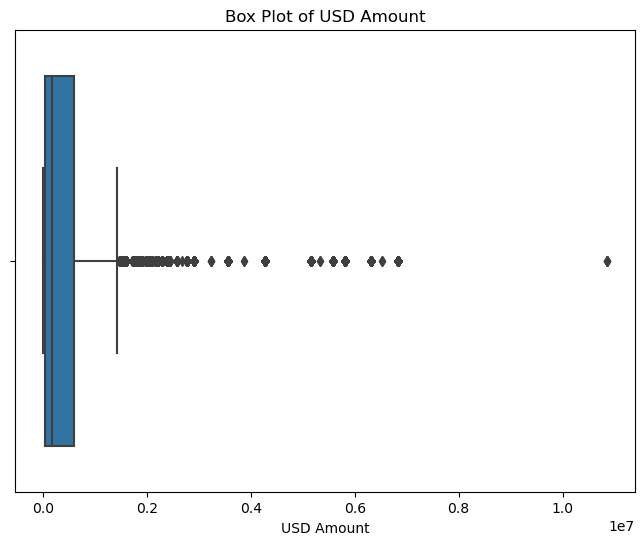

In [882]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_rcd['USD Amount'])
plt.xlabel('USD Amount')
plt.title('Box Plot of USD Amount')
plt.show()

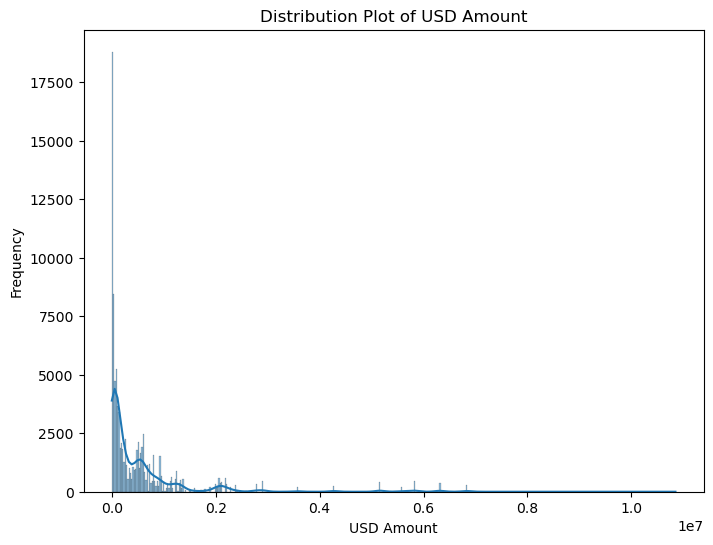

In [883]:
# Plot the histogram to check the sprade of amount. We can see that major of the transaction are with value less than 1.5 million USD.


plt.figure(figsize=(8, 6))
sns.histplot(data=data_rcd, x='USD Amount', kde=True)
plt.xlabel('USD Amount')
plt.ylabel('Frequency')
plt.title('Distribution Plot of USD Amount')


plt.show()

In [884]:
# Lets form quantiles and analyse them to check the behaviour customers.

data_rcd['INVOICE_RANGE'] = pd.qcut(data_rcd['USD Amount'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [885]:
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE           PAYMENT_TERM INVOICE_CLASS  \
0            2020-11-02 2020-12-30       30 Days from EOM           INV   
1            2020-12-29 2021-01-28  30 Days from Inv Date           INV   
2            2021-01-30 2021-03-01  30 Days from Inv Date           INV   
3            2020-12-15 2021-01-14  30 Days from Inv Date           INV   
4            2020-12-15 2021-01-14  30 Days from Inv Date           INV   

  INVOICE_CURRENCY_CODE  TARGET INVOICE_RANGE  
0                   AED       1            Q2  
1                   SAR       1            Q2  
2                   SAR       0            Q2  
3                   SAR       1            Q2  
4                   SAR       1            Q2

<Figure size 800x600 with 0 Axes>

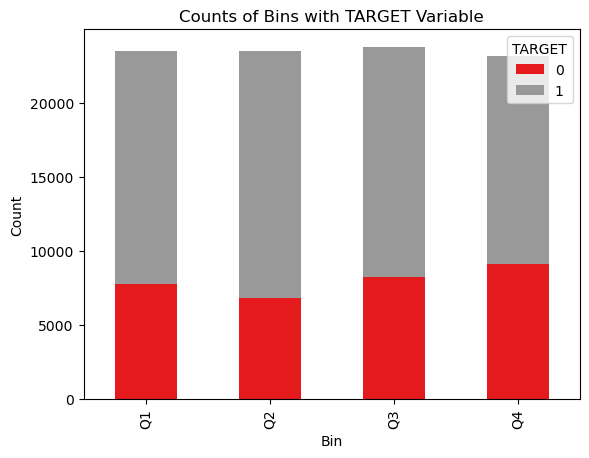

In [886]:
pivot_df = data_rcd.pivot_table(index='INVOICE_RANGE', columns='TARGET', values='CUSTOMER_NAME', aggfunc='count', fill_value=0)

# Plot the counts with the 'TARGET' variable as a stacked bar plot
plt.figure(figsize=(8, 6))
pivot_df.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Counts of Bins with TARGET Variable')
plt.xlabel('Bin')
plt.ylabel('Count')

plt.show()

- We can see that Q4 has slightly higher prone to late payment.

In [887]:
data_rcd['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                                      19870
30 Days from Inv Date                                      14672
60 Days from EOM                                           12518
30 Days from EOM                                           11306
15 Days from EOM                                            7544
Immediate Payment                                           5474
Immediate                                                   5261
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1241
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EOM            

In [888]:
# As we see below line graph there are various payment terms and observed that immediate is two times in different text, lets make it similar

data_rcd.loc[data_rcd['PAYMENT_TERM'] == 'Immediate Payment', 'PAYMENT_TERM'] = 'Immediate'

In [889]:
allowed_values = ['60 Days from Inv Date', '30 Days from Inv Date', '60 Days from EOM', '30 Days from EOM','Immediate',
                      '15 Days from EOM','90 Days from EOM','45 Days from Inv Date','45 Days from EOM','90 Days from Inv Date',
                      '100% Adv Payment']

# Function to replace values not in the allowed list with 'Others'
def replace_with_others(value):
    if value not in allowed_values:
        return 'Others'
    return value

# Apply the custom function to the column
data_rcd['PAYMENT_TERM'] = data_rcd['PAYMENT_TERM'].apply(replace_with_others)

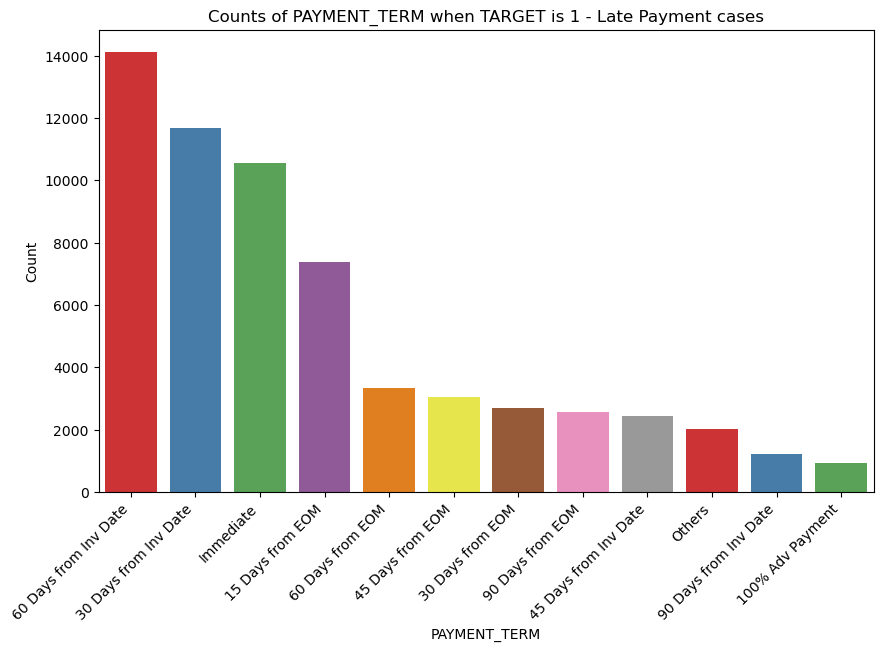

In [890]:
# Lets check which under which payment term vendors are making late payments the most.

filtered_data = data_rcd[data_rcd['TARGET'] == 1]

# Calculate the counts of each payment term
payment_counts = filtered_data['PAYMENT_TERM'].value_counts().reset_index()
payment_counts.columns = ['PAYMENT_TERM', 'Count']

# Create a bar plot for the counts with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.barplot(x='PAYMENT_TERM', y='Count', data=payment_counts, palette='Set1')
plt.title('Counts of PAYMENT_TERM when TARGET is 1 - Late Payment cases')
plt.xlabel('PAYMENT_TERM')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels for better visibility

plt.show()


#### - We can see from above bar plot, 60 days, 30 days and immediate payment terms are with most delayes and can be targeted.

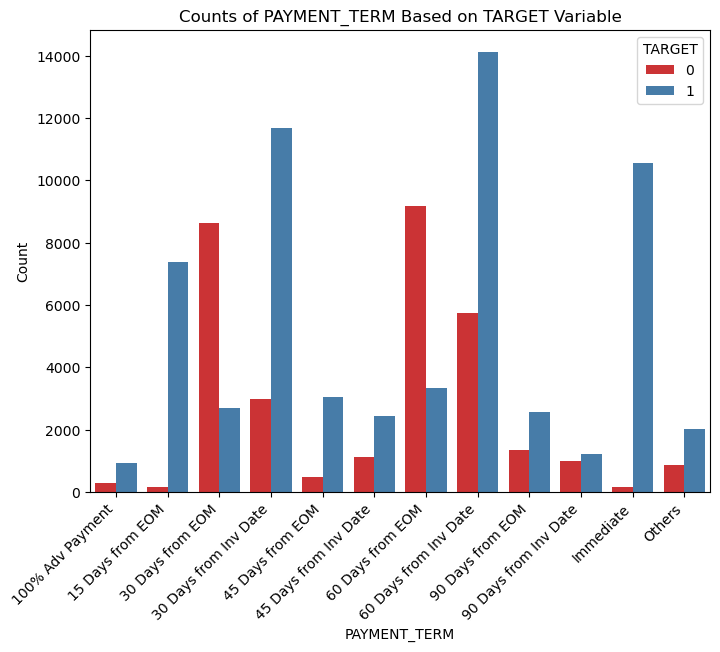

In [891]:
# Lets segrigate under which payment term, vendors are deviating the most.

count_df = data_rcd.groupby(['PAYMENT_TERM', 'TARGET']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x='PAYMENT_TERM', y='Count', hue='TARGET', palette='Set1')
plt.title('Counts of PAYMENT_TERM Based on TARGET Variable')
plt.xlabel('PAYMENT_TERM')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### - Here also we can see that 60 days, 30 days and immediate are to be keep on priority. Later we can check at customer level also.

In [892]:
# Check for class immbalance

class_counts = data_rcd['TARGET'].value_counts()

In [893]:
late_payment_ratio = class_counts[1] / (class_counts[1]+class_counts[0])
late_payment_ratio

0.6597826202667746

- Here we can see that class distribusion is 66% which is not immbalnce. Also we are available with nearly ~93k rows hence need not to treat the class immbalnce.

In [894]:
data_rcd['INVOICE_CURRENCY_CODE'].value_counts()

SAR    39199
AED    32377
USD    18547
EUR     1519
KWD     1089
QAR      611
BHD      400
GBP      134
JOD       38
ZAR       23
Name: INVOICE_CURRENCY_CODE, dtype: int64

<Figure size 1400x800 with 0 Axes>

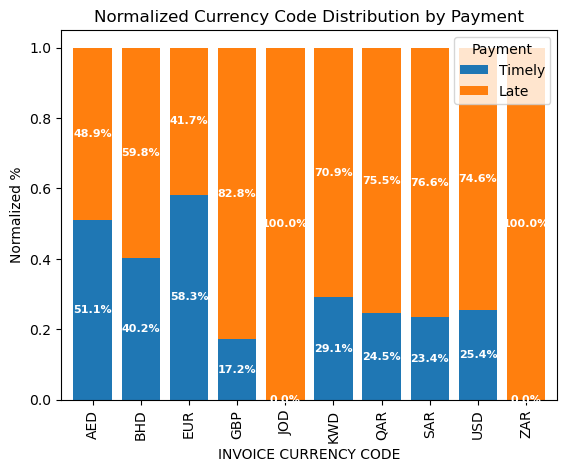

In [895]:
# Lets check for under which currency how is the trend for late payment.

normalized_counts = data_rcd.groupby(['INVOICE_CURRENCY_CODE', 'TARGET']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Create a bar chart for the normalized values and add text labels
plt.figure(figsize=(14, 8))
ax = normalized_counts.plot(kind='bar', stacked=True, width=.8)
plt.title('Normalized Currency Code Distribution by Payment')
plt.xlabel('INVOICE CURRENCY CODE')
plt.ylabel('Normalized %')
plt.legend(title='Payment', labels=['Timely', 'Late'])

# Add text labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, fontweight='bold', color='white')

plt.show()


- We can observe that currency 'AED' and 'EUR' are comparatively good paymaster than others. 

In [896]:
# Check for type of invoices made and thier percentage

data_rcd['INVOICE_CLASS'].value_counts(normalize=True)

INV    0.938118
CM     0.056006
DM     0.005876
Name: INVOICE_CLASS, dtype: float64

<Figure size 1200x800 with 0 Axes>

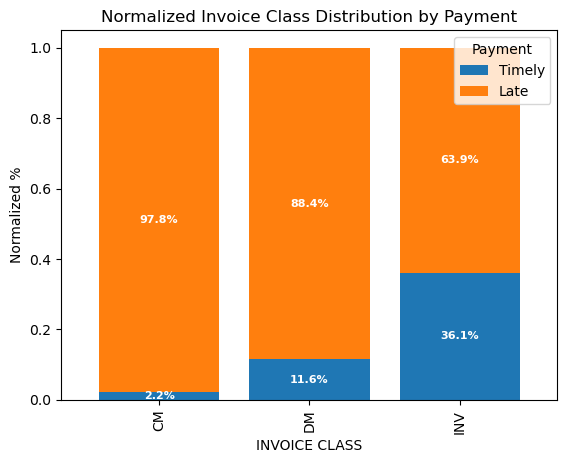

In [897]:
# See how is the behaviour of payments against type of invoice.

normalized_counts = data_rcd.groupby(['INVOICE_CLASS', 'TARGET']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Create a bar chart for the normalized values and add text labels
plt.figure(figsize=(12, 8))
ax = normalized_counts.plot(kind='bar', stacked=True, width=.8)
plt.title('Normalized Invoice Class Distribution by Payment')
plt.xlabel('INVOICE CLASS')
plt.ylabel('Normalized %')
plt.legend(title='Payment', labels=['Timely', 'Late'])

# Add text labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, fontweight='bold', color='white')

plt.show()


- From above graph, CM has tendancy to pay late compared to other. However there are very few cases of CM.

### Feature Engineering

In [898]:
# As payment term has so many values, so deriving credit days.

data_rcd['CREDIT_DAYS'] = (data_rcd['DUE_DATE'] - data_rcd['INVOICE_CREATION_DATE']).dt.days

In [899]:
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE           PAYMENT_TERM INVOICE_CLASS  \
0            2020-11-02 2020-12-30       30 Days from EOM           INV   
1            2020-12-29 2021-01-28  30 Days from Inv Date           INV   
2            2021-01-30 2021-03-01  30 Days from Inv Date           INV   
3            2020-12-15 2021-01-14  30 Days from Inv Date           INV   
4            2020-12-15 2021-01-14  30 Days from Inv Date           INV   

  INVOICE_CURRENCY_CODE  TARGET INVOICE_RANGE  CREDIT_DAYS  
0                   AED       1            Q2           58  
1                   SAR       1            Q2           30  
2                   SAR       0            Q2           30  
3                   SAR       1            Q2           30  
4                   SAR       1            Q2           30

In [900]:
data_rcd['CREDIT_DAYS'].describe()

count    93937.000000
mean        42.291749
std         61.396547
min      -3622.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        365.000000
Name: CREDIT_DAYS, dtype: float64

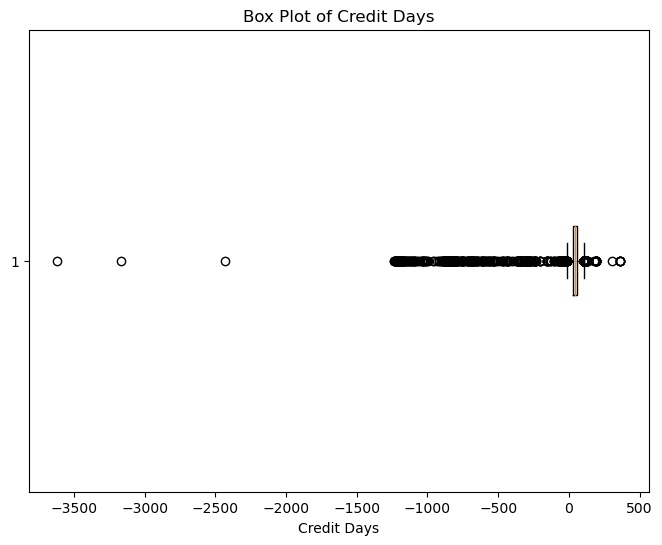

In [901]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_rcd['CREDIT_DAYS'], vert=False)
plt.title('Box Plot of Credit Days')
plt.xlabel('Credit Days')
plt.show()

In [902]:
# As we see there are negative credit days, actually these are advance payments, so imputing these values with zero credit days

data_rcd['CREDIT_DAYS'] = data_rcd['CREDIT_DAYS'].apply(lambda x: max(0, x))

In [903]:
data_rcd['CREDIT_DAYS'].describe()

count    93937.000000
mean        45.532240
std         27.380091
min          0.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        365.000000
Name: CREDIT_DAYS, dtype: float64

In [904]:
np.sort(data_rcd['CREDIT_DAYS'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 137, 180, 195, 304, 363, 365], dtype=int64)

In [905]:
# Lets create Bins for credit terms from 'Credit Days' array.

bins = [0, 30, 45, 60, 90, 1000]
data_rcd['CREDIT_TERM'] = pd.cut(data_rcd['CREDIT_DAYS'], bins=bins, labels=['<30 DAYS', '<45 DAYS', '<60 DAYS','<90 DAYS','>90 DAYS'])

In [906]:
data_rcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CUSTOMER_NAME          93937 non-null  object        
 1   CUSTOMER_NUMBER        93937 non-null  int64         
 2   RECEIPT_DATE           93937 non-null  datetime64[ns]
 3   USD Amount             93937 non-null  float64       
 4   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 5   DUE_DATE               93937 non-null  datetime64[ns]
 6   PAYMENT_TERM           93937 non-null  object        
 7   INVOICE_CLASS          93937 non-null  object        
 8   INVOICE_CURRENCY_CODE  93937 non-null  object        
 9   TARGET                 93937 non-null  int64         
 10  INVOICE_RANGE          93937 non-null  category      
 11  CREDIT_DAYS            93937 non-null  int64         
 12  CREDIT_TERM            81077 non-null  category      
dtypes

In [907]:
# Coverting to proper format.

data_rcd['CREDIT_TERM'] = data_rcd['CREDIT_TERM'].astype(str)

In [908]:
# Also there are some NaN values which need to be treated.

data_rcd['CREDIT_TERM'] = data_rcd['CREDIT_TERM'].replace('nan', 'Advance/Immediate')

In [909]:
data_rcd.tail()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE  USD Amount  \
93932     PEAR Corp            21144   2021-04-01    59914.50   
93933     PEAR Corp            21144   2021-04-01    59914.50   
93934     PEAR Corp            21144   2021-04-01    59914.50   
93935     NAMS Corp            21145   2021-04-01    23574.33   
93936     SENS Corp            48486   2021-04-08     1443.43   

      INVOICE_CREATION_DATE   DUE_DATE           PAYMENT_TERM INVOICE_CLASS  \
93932            2020-12-28 2020-12-28              Immediate            CM   
93933            2020-12-28 2020-12-28              Immediate            CM   
93934            2020-12-28 2020-12-28              Immediate            CM   
93935            2021-01-24 2021-03-24  60 Days from Inv Date           INV   
93936            2021-02-16 2021-03-30       30 Days from EOM           INV   

      INVOICE_CURRENCY_CODE  TARGET INVOICE_RANGE  CREDIT_DAYS  \
93932                   USD       1            Q2            0   
93933                   USD       1            Q2            0   
93934                   USD       1            Q2            0   
93935                   AED       1            Q1           59   
93936                   AED       1            Q1           42   

             CREDIT_TERM  
93932  Advance/Immediate  
93933  Advance/Immediate  
93934  Advance/Immediate  
93935           <60 DAYS  
93936           <45 DAYS

In [910]:
# Checking any NA value.

data_rcd['CREDIT_TERM'].isna().sum()

0

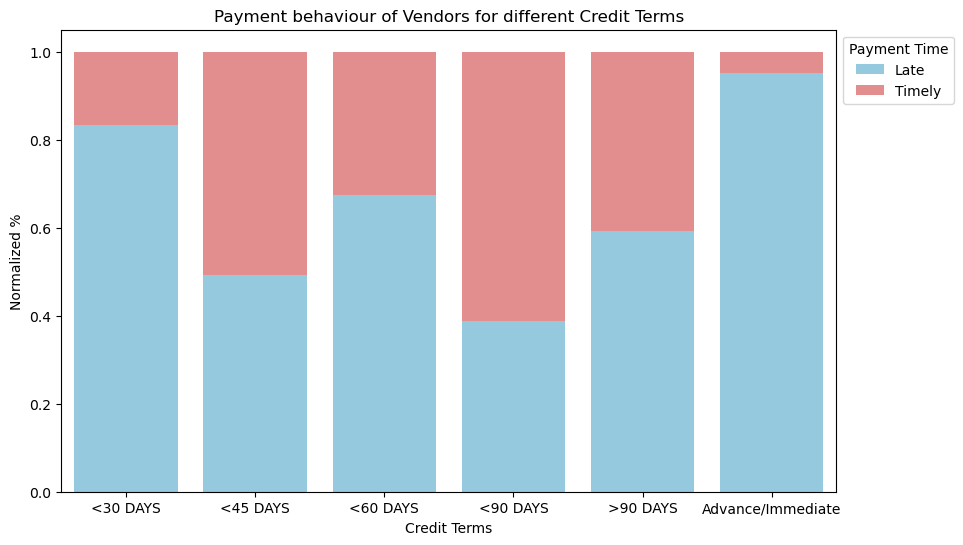

In [911]:
# Lets check again behaviour of payment w.r.to payemnt term with new derived features.

normalized_counts = data_rcd.groupby(['CREDIT_TERM', 'TARGET']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_counts.index, y=normalized_counts[1], color='skyblue', label='Late')
sns.barplot(x=normalized_counts.index, y=normalized_counts[0], bottom=normalized_counts[1], color='lightcoral', label='Timely')
plt.xlabel('Credit Terms')
plt.ylabel('Normalized %')
plt.title('Payment behaviour of Vendors for different Credit Terms')
plt.legend(title='Payment Time', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

- Here we can observe that payment term with 30 Days, 60 Days, and Immediate has to keep an eye.

In [912]:
# As payment term has so many different values, and we have also derived credit days feature so dropping payment term

data_rcd.drop(['PAYMENT_TERM'],axis=1,inplace=True)

In [913]:
# We have created buckets for credit days so dropping credit days variable

data_rcd.drop(['CREDIT_DAYS'],axis=1,inplace=True)

In [914]:
# deriving actual payment days of invoices

data_rcd['PAYMENT_DAYS'] = (data_rcd['RECEIPT_DATE'] - data_rcd['INVOICE_CREATION_DATE']).dt.days

In [915]:
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE INVOICE_CLASS INVOICE_CURRENCY_CODE  \
0            2020-11-02 2020-12-30           INV                   AED   
1            2020-12-29 2021-01-28           INV                   SAR   
2            2021-01-30 2021-03-01           INV                   SAR   
3            2020-12-15 2021-01-14           INV                   SAR   
4            2020-12-15 2021-01-14           INV                   SAR   

   TARGET INVOICE_RANGE CREDIT_TERM  PAYMENT_DAYS  
0       1            Q2    <60 DAYS           169  
1       1            Q2    <30 DAYS            33  
2       0            Q2    <30 DAYS             1  
3       1            Q2    <30 DAYS            47  
4       1            Q2    <30 DAYS            47

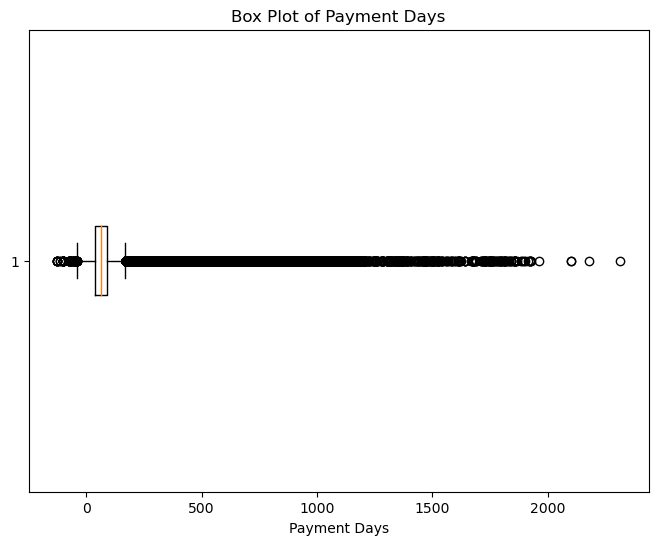

In [916]:
# Check the box plot for distribusion of payment days.

plt.figure(figsize=(8, 6))
plt.boxplot(data_rcd['PAYMENT_DAYS'], vert=False)
plt.title('Box Plot of Payment Days')
plt.xlabel('Payment Days')
plt.show()

- We can see there are trend is very continous expect few outliers, but they are also very near to last values. Hence not treating as of now.

In [917]:
# Deriving average of payment days for customer wise.

data_rcd['AVERAGE_PAYMENT_DAYS'] = data_rcd.groupby('CUSTOMER_NUMBER')['PAYMENT_DAYS'].transform('mean')

In [918]:
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE INVOICE_CLASS INVOICE_CURRENCY_CODE  \
0            2020-11-02 2020-12-30           INV                   AED   
1            2020-12-29 2021-01-28           INV                   SAR   
2            2021-01-30 2021-03-01           INV                   SAR   
3            2020-12-15 2021-01-14           INV                   SAR   
4            2020-12-15 2021-01-14           INV                   SAR   

   TARGET INVOICE_RANGE CREDIT_TERM  PAYMENT_DAYS  AVERAGE_PAYMENT_DAYS  
0       1            Q2    <60 DAYS           169             99.000000  
1       1            Q2    <30 DAYS            33             52.588235  
2       0            Q2    <30 DAYS             1             52.588235  
3       1            Q2    <30 DAYS            47            151.501769  
4       1            Q2    <30 DAYS            47             52.588235

In [919]:
data_rcd.tail()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE  USD Amount  \
93932     PEAR Corp            21144   2021-04-01    59914.50   
93933     PEAR Corp            21144   2021-04-01    59914.50   
93934     PEAR Corp            21144   2021-04-01    59914.50   
93935     NAMS Corp            21145   2021-04-01    23574.33   
93936     SENS Corp            48486   2021-04-08     1443.43   

      INVOICE_CREATION_DATE   DUE_DATE INVOICE_CLASS INVOICE_CURRENCY_CODE  \
93932            2020-12-28 2020-12-28            CM                   USD   
93933            2020-12-28 2020-12-28            CM                   USD   
93934            2020-12-28 2020-12-28            CM                   USD   
93935            2021-01-24 2021-03-24           INV                   AED   
93936            2021-02-16 2021-03-30           INV                   AED   

       TARGET INVOICE_RANGE        CREDIT_TERM  PAYMENT_DAYS  \
93932       1            Q2  Advance/Immediate            94   
93933       1            Q2  Advance/Immediate            94   
93934       1            Q2  Advance/Immediate            94   
93935       1            Q1           <60 DAYS            67   
93936       1            Q1           <45 DAYS            51   

       AVERAGE_PAYMENT_DAYS  
93932             70.111111  
93933             70.111111  
93934             70.111111  
93935             77.264151  
93936             96.000000

In [920]:
data_rcd['CREDIT_TERM'].value_counts()

<60 DAYS             25129
<30 DAYS             19520
<90 DAYS             16907
<45 DAYS             15922
Advance/Immediate    12860
>90 DAYS              3599
Name: CREDIT_TERM, dtype: int64

In [921]:
# Deriving std deviation of payment days for customer wise.

data_rcd['STD_DEV_PAYMENT_DAYS'] = data_rcd.groupby('CUSTOMER_NUMBER')['PAYMENT_DAYS'].transform('std')

In [922]:
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE INVOICE_CLASS INVOICE_CURRENCY_CODE  \
0            2020-11-02 2020-12-30           INV                   AED   
1            2020-12-29 2021-01-28           INV                   SAR   
2            2021-01-30 2021-03-01           INV                   SAR   
3            2020-12-15 2021-01-14           INV                   SAR   
4            2020-12-15 2021-01-14           INV                   SAR   

   TARGET INVOICE_RANGE CREDIT_TERM  PAYMENT_DAYS  AVERAGE_PAYMENT_DAYS  \
0       1            Q2    <60 DAYS           169             99.000000   
1       1            Q2    <30 DAYS            33             52.588235   
2       0            Q2    <30 DAYS             1             52.588235   
3       1            Q2    <30 DAYS            47            151.501769   
4       1            Q2    <30 DAYS            47             52.588235   

   STD_DEV_PAYMENT_DAYS  
0             64.490309  
1             35.855932  
2             35.855932  
3            256.743864  
4             35.855932

In [923]:
data_rcd[data_rcd['STD_DEV_PAYMENT_DAYS'].isna()]

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
293       VISA Corp            34272   2021-01-07   3158.568891   
2403      AL H Corp            41719   2021-04-12   1604.159475   
3156      AL A Corp            34569   2021-05-04  15415.586500   
3208      ABU  Corp            34230   2021-05-11   6665.334875   
4691      RICH Corp            51840   2021-04-08  11343.333500   
...             ...              ...          ...           ...   
92960     ROYA Corp            42041   2021-05-03  28422.760000   
92961     MEDI Corp            41320   2021-05-08    575.440000   
92964     HILT Corp            52060   2021-05-10    889.700000   
92998     MACH Corp             4241   2021-05-17   2764.590000   
93002     FOUR Corp            51700   2021-05-22  10278.840000   

      INVOICE_CREATION_DATE   DUE_DATE INVOICE_CLASS INVOICE_CURRENCY_CODE  \
293              2020-10-05 2020-11-04           INV                   SAR   
2403             2021-04-11 2021-05-15           INV                   SAR   
3156             2020-12-16 2021-01-30           INV                   SAR   
3208             2019-12-09 2020-01-25           INV                   SAR   
4691             2021-03-29 2021-05-28           INV                   SAR   
...                     ...        ...           ...                   ...   
92960            2021-04-29 2021-05-29           INV                   USD   
92961            2021-01-12 2021-02-28           INV                   AED   
92964            2021-04-17 2021-04-17           INV                   AED   
92998            2020-11-19 2021-01-18           INV                   QAR   
93002            2021-03-17 2021-04-16           INV                   USD   

       TARGET INVOICE_RANGE        CREDIT_TERM  PAYMENT_DAYS  \
293         1            Q1           <30 DAYS            94   
2403        0            Q1           <45 DAYS             1   
3156        1            Q1           <45 DAYS           139   
3208        1            Q1           <60 DAYS           519   
4691        0            Q1           <60 DAYS            10   
...       ...           ...                ...           ...   
92960       0            Q1           <30 DAYS             4   
92961       1            Q1           <60 DAYS           116   
92964       1            Q1  Advance/Immediate            23   
92998       1            Q1           <60 DAYS           179   
93002       1            Q1           <30 DAYS            66   

       AVERAGE_PAYMENT_DAYS  STD_DEV_PAYMENT_DAYS  
293                    94.0                   NaN  
2403                    1.0                   NaN  
3156                  139.0                   NaN  
3208                  519.0                   NaN  
4691                   10.0                   NaN  
...                     ...                   ...  
92960                   4.0                   NaN  
92961                 116.0                   NaN  
92964                  23.0                   NaN  
92998                 179.0                   NaN  
93002                  66.0                   NaN  

[156 rows x 14 columns]

In [924]:
156/93937*100

0.16606874820358325

In [925]:
# There are some null rows with 0.16% which are less hence we are dropping these rows.

pd.set_option('display.max_columns', None)
a = data_rcd[data_rcd['STD_DEV_PAYMENT_DAYS'].isnull()]
data_rcd.drop(a.index, inplace=True)

In [926]:
data_rcd[data_rcd['STD_DEV_PAYMENT_DAYS'].isnull()]

Empty DataFrame
Columns: [CUSTOMER_NAME, CUSTOMER_NUMBER, RECEIPT_DATE, USD Amount, INVOICE_CREATION_DATE, DUE_DATE, INVOICE_CLASS, INVOICE_CURRENCY_CODE, TARGET, INVOICE_RANGE, CREDIT_TERM, PAYMENT_DAYS, AVERAGE_PAYMENT_DAYS, STD_DEV_PAYMENT_DAYS]
Index: []

------------------------------------------------------------------------------------------------------------------------

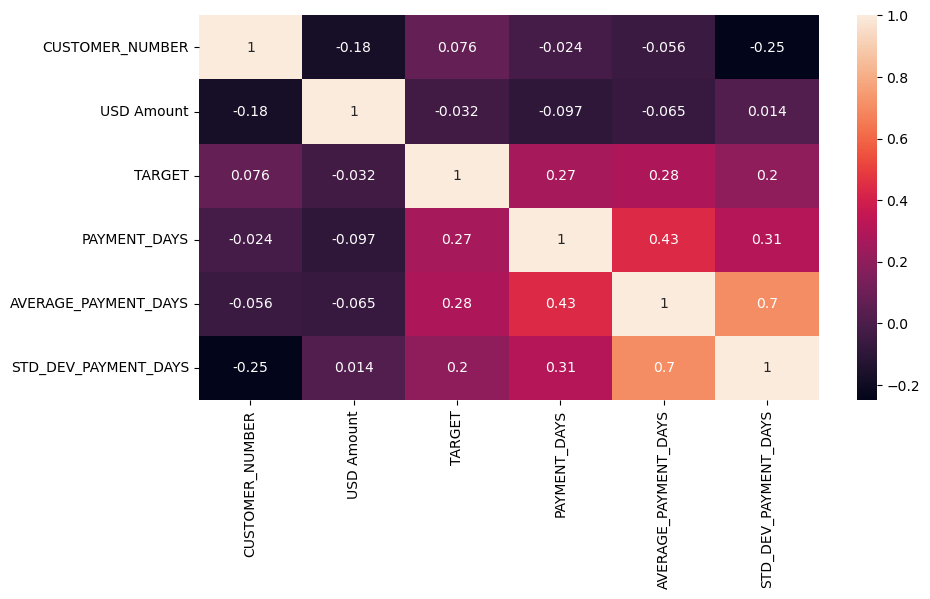

In [927]:
# To check the correlation among varibles

plt.figure(figsize=(10,5))
sns.heatmap(data_rcd.corr(), annot = True)
plt.show()

- Here we can see there is good corelation of Target variable with Average Payment days. It means as Average Payment days are more there are more chances that payment may get delayed.

### Dummy Variables

In [928]:
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE INVOICE_CLASS INVOICE_CURRENCY_CODE  \
0            2020-11-02 2020-12-30           INV                   AED   
1            2020-12-29 2021-01-28           INV                   SAR   
2            2021-01-30 2021-03-01           INV                   SAR   
3            2020-12-15 2021-01-14           INV                   SAR   
4            2020-12-15 2021-01-14           INV                   SAR   

   TARGET INVOICE_RANGE CREDIT_TERM  PAYMENT_DAYS  AVERAGE_PAYMENT_DAYS  \
0       1            Q2    <60 DAYS           169             99.000000   
1       1            Q2    <30 DAYS            33             52.588235   
2       0            Q2    <30 DAYS             1             52.588235   
3       1            Q2    <30 DAYS            47            151.501769   
4       1            Q2    <30 DAYS            47             52.588235   

   STD_DEV_PAYMENT_DAYS  
0             64.490309  
1             35.855932  
2             35.855932  
3            256.743864  
4             35.855932

In [929]:
# Convert into dummies

data_dummies = pd.get_dummies(data_rcd[['INVOICE_CLASS','INVOICE_CURRENCY_CODE','CREDIT_TERM']], drop_first=True)
data_dummies.head()

INVOICE_CLASS_DM  INVOICE_CLASS_INV  INVOICE_CURRENCY_CODE_BHD  \
0                 0                  1                          0   
1                 0                  1                          0   
2                 0                  1                          0   
3                 0                  1                          0   
4                 0                  1                          0   

   INVOICE_CURRENCY_CODE_EUR  INVOICE_CURRENCY_CODE_GBP  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_JOD  INVOICE_CURRENCY_CODE_KWD  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_QAR  INVOICE_CURRENCY_CODE_SAR  \
0                          0                          0   
1                          0                          1   
2                          0                          1   
3                          0                          1   
4                          0                          1   

   INVOICE_CURRENCY_CODE_USD  INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  \
0                          0                          0                     0   
1                          0                          0                     0   
2                          0                          0                     0   
3                          0                          0                     0   
4                          0                          0                     0   

   CREDIT_TERM_<60 DAYS  CREDIT_TERM_<90 DAYS  CREDIT_TERM_>90 DAYS  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   CREDIT_TERM_Advance/Immediate  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [930]:
# Create dummy variables using the 'get_dummies'

leads_dum = pd.concat([data_rcd, data_dummies], axis=1)
leads_dum

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0         C EA Corp            37403   2021-04-20  101018.63040   
1         RADW Corp             4003   2021-01-31   48990.21133   
2         RADW Corp             4003   2021-01-31   41991.60971   
3         FARO Corp             1409   2021-01-31   41991.60971   
4         RADW Corp             4003   2021-01-31   41991.60971   
...             ...              ...          ...           ...   
93932     PEAR Corp            21144   2021-04-01   59914.50000   
93933     PEAR Corp            21144   2021-04-01   59914.50000   
93934     PEAR Corp            21144   2021-04-01   59914.50000   
93935     NAMS Corp            21145   2021-04-01   23574.33000   
93936     SENS Corp            48486   2021-04-08    1443.43000   

      INVOICE_CREATION_DATE   DUE_DATE INVOICE_CLASS INVOICE_CURRENCY_CODE  \
0                2020-11-02 2020-12-30           INV                   AED   
1                2020-12-29 2021-01-28           INV                   SAR   
2                2021-01-30 2021-03-01           INV                   SAR   
3                2020-12-15 2021-01-14           INV                   SAR   
4                2020-12-15 2021-01-14           INV                   SAR   
...                     ...        ...           ...                   ...   
93932            2020-12-28 2020-12-28            CM                   USD   
93933            2020-12-28 2020-12-28            CM                   USD   
93934            2020-12-28 2020-12-28            CM                   USD   
93935            2021-01-24 2021-03-24           INV                   AED   
93936            2021-02-16 2021-03-30           INV                   AED   

       TARGET INVOICE_RANGE        CREDIT_TERM  PAYMENT_DAYS  \
0           1            Q2           <60 DAYS           169   
1           1            Q2           <30 DAYS            33   
2           0            Q2           <30 DAYS             1   
3           1            Q2           <30 DAYS            47   
4           1            Q2           <30 DAYS            47   
...       ...           ...                ...           ...   
93932       1            Q2  Advance/Immediate            94   
93933       1            Q2  Advance/Immediate            94   
93934       1            Q2  Advance/Immediate            94   
93935       1            Q1           <60 DAYS            67   
93936       1            Q1           <45 DAYS            51   

       AVERAGE_PAYMENT_DAYS  STD_DEV_PAYMENT_DAYS  INVOICE_CLASS_DM  \
0                 99.000000             64.490309                 0   
1                 52.588235             35.855932                 0   
2                 52.588235             35.855932                 0   
3                151.501769            256.743864                 0   
4                 52.588235             35.855932                 0   
...                     ...                   ...               ...   
93932             70.111111             21.175700                 0   
93933             70.111111             21.175700                 0   
93934             70.111111             21.175700                 0   
93935             77.264151             22.951367                 0   
93936             96.000000            110.363685                 0   

       INVOICE_CLASS_INV  INVOICE_CURRENCY_CODE_BHD  \
0                      1                          0   
1                      1                          0   
2                      1                          0   
3                      1                          0   
4                      1                          0   
...                  ...                        ...   
93932                  0                          0   
93933                  0                          0   
93934                  0                          0   
93935                  1                          0   
93936                  1             

In [931]:
leads_dum.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE INVOICE_CLASS INVOICE_CURRENCY_CODE  \
0            2020-11-02 2020-12-30           INV                   AED   
1            2020-12-29 2021-01-28           INV                   SAR   
2            2021-01-30 2021-03-01           INV                   SAR   
3            2020-12-15 2021-01-14           INV                   SAR   
4            2020-12-15 2021-01-14           INV                   SAR   

   TARGET INVOICE_RANGE CREDIT_TERM  PAYMENT_DAYS  AVERAGE_PAYMENT_DAYS  \
0       1            Q2    <60 DAYS           169             99.000000   
1       1            Q2    <30 DAYS            33             52.588235   
2       0            Q2    <30 DAYS             1             52.588235   
3       1            Q2    <30 DAYS            47            151.501769   
4       1            Q2    <30 DAYS            47             52.588235   

   STD_DEV_PAYMENT_DAYS  INVOICE_CLASS_DM  INVOICE_CLASS_INV  \
0             64.490309                 0                  1   
1             35.855932                 0                  1   
2             35.855932                 0                  1   
3            256.743864                 0                  1   
4             35.855932                 0                  1   

   INVOICE_CURRENCY_CODE_BHD  INVOICE_CURRENCY_CODE_EUR  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_JOD  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_KWD  INVOICE_CURRENCY_CODE_QAR  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_USD  \
0                          0                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          1                          0   

   INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  CREDIT_TERM_<60 DAYS  \
0                          0                     0                     1   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   CREDIT_TERM_<90 DAYS  CREDIT_TERM_>90 DAYS  CREDIT_TERM_Advance/Immediate  
0                     0                     0                              0  
1                     0                     0                              0  
2                     0                     0                              0  
3                     0                     0                              0  
4                     0                     0                         

#### Dropping the repeated variables

In [932]:
# We have created dummies for the below variables, so we can drop them

data_rcd = leads_dum.drop(['INVOICE_CLASS','INVOICE_CURRENCY_CODE','CREDIT_TERM'], 1)


In [933]:
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE  TARGET INVOICE_RANGE  PAYMENT_DAYS  \
0            2020-11-02 2020-12-30       1            Q2           169   
1            2020-12-29 2021-01-28       1            Q2            33   
2            2021-01-30 2021-03-01       0            Q2             1   
3            2020-12-15 2021-01-14       1            Q2            47   
4            2020-12-15 2021-01-14       1            Q2            47   

   AVERAGE_PAYMENT_DAYS  STD_DEV_PAYMENT_DAYS  INVOICE_CLASS_DM  \
0             99.000000             64.490309                 0   
1             52.588235             35.855932                 0   
2             52.588235             35.855932                 0   
3            151.501769            256.743864                 0   
4             52.588235             35.855932                 0   

   INVOICE_CLASS_INV  INVOICE_CURRENCY_CODE_BHD  INVOICE_CURRENCY_CODE_EUR  \
0                  1                          0                          0   
1                  1                          0                          0   
2                  1                          0                          0   
3                  1                          0                          0   
4                  1                          0                          0   

   INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_JOD  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_KWD  INVOICE_CURRENCY_CODE_QAR  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_USD  \
0                          0                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          1                          0   

   INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  CREDIT_TERM_<60 DAYS  \
0                          0                     0                     1   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   CREDIT_TERM_<90 DAYS  CREDIT_TERM_>90 DAYS  CREDIT_TERM_Advance/Immediate  
0                     0                     0                              0  
1                     0                     0                              0  
2                     0                     0                              0  
3                     0                     0                              0  
4                     0                     0                              0

--------------------------------------------------------------------------------------------------------------------------------

# Step 2

## Modeling

### 1. Clustering

In [934]:
# Import all important libraries for clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [935]:
# Form a cluster based on 'AVERAGE_PAYMENT_DAYS' and 'STD_DEV_PAYMENT_DAYS']

data_rcd_kmeans = data_rcd[['AVERAGE_PAYMENT_DAYS', 'STD_DEV_PAYMENT_DAYS']]

In [936]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(data_rcd[['AVERAGE_PAYMENT_DAYS', 'STD_DEV_PAYMENT_DAYS']])

KMeans(max_iter=50, n_clusters=4)

In [937]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

## Finding the Optimal Number of Clusters

### Elbow curve method/SSD

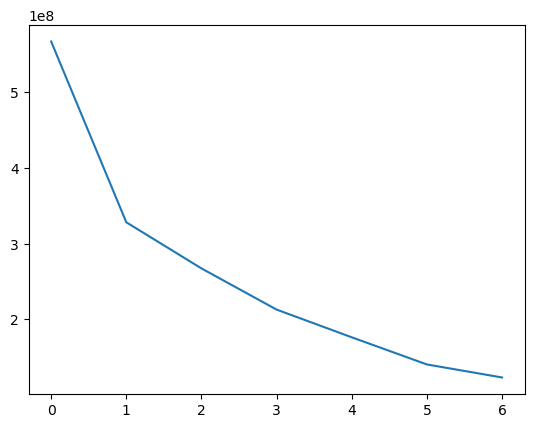

In [938]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_rcd_kmeans)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette analysis

In [939]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# for num_clusters in range_n_clusters:

#     # intialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#     kmeans.fit(data_rcd_kmeans)

#     cluster_labels = kmeans.labels_

#     # silhouette score
#     silhouette_avg = silhouette_score(data_rcd_kmeans, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



- Note: Silhouette analysis may take very large amount of time depending on machine. Hence we have run the model and marked then as commented. You can un comment it and run the model.

- From both the models we can see that we are getting better cluster density with k=3

In [940]:
# final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_rcd_kmeans)

KMeans(max_iter=50, n_clusters=3)

In [941]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [942]:
# assign the label for cluster.

data_rcd['CLUSTER_ID'] = kmeans.labels_
data_rcd.head()

CUSTOMER_NAME  CUSTOMER_NUMBER RECEIPT_DATE    USD Amount  \
0     C EA Corp            37403   2021-04-20  101018.63040   
1     RADW Corp             4003   2021-01-31   48990.21133   
2     RADW Corp             4003   2021-01-31   41991.60971   
3     FARO Corp             1409   2021-01-31   41991.60971   
4     RADW Corp             4003   2021-01-31   41991.60971   

  INVOICE_CREATION_DATE   DUE_DATE  TARGET INVOICE_RANGE  PAYMENT_DAYS  \
0            2020-11-02 2020-12-30       1            Q2           169   
1            2020-12-29 2021-01-28       1            Q2            33   
2            2021-01-30 2021-03-01       0            Q2             1   
3            2020-12-15 2021-01-14       1            Q2            47   
4            2020-12-15 2021-01-14       1            Q2            47   

   AVERAGE_PAYMENT_DAYS  STD_DEV_PAYMENT_DAYS  INVOICE_CLASS_DM  \
0             99.000000             64.490309                 0   
1             52.588235             35.855932                 0   
2             52.588235             35.855932                 0   
3            151.501769            256.743864                 0   
4             52.588235             35.855932                 0   

   INVOICE_CLASS_INV  INVOICE_CURRENCY_CODE_BHD  INVOICE_CURRENCY_CODE_EUR  \
0                  1                          0                          0   
1                  1                          0                          0   
2                  1                          0                          0   
3                  1                          0                          0   
4                  1                          0                          0   

   INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_JOD  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_KWD  INVOICE_CURRENCY_CODE_QAR  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_USD  \
0                          0                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          1                          0   

   INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  CREDIT_TERM_<60 DAYS  \
0                          0                     0                     1   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   CREDIT_TERM_<90 DAYS  CREDIT_TERM_>90 DAYS  CREDIT_TERM_Advance/Immediate  \
0                     0                     0                              0   
1                     0                     0                              0   
2                     0                     0                              0   
3                     0                     0                              0   
4                     0                     0                              0   

   CLUSTER_ID  
0           0  
1           0  
2           0  
3           1  
4           0

<AxesSubplot:xlabel='CLUSTER_ID', ylabel='USD Amount'>

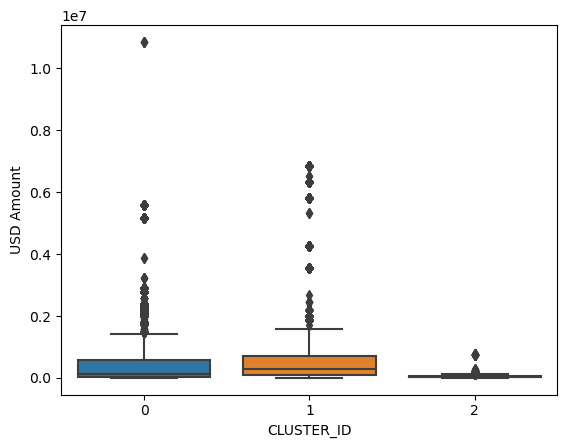

In [943]:
# Make a box plot to check distribusion w.r.to USD amount.

sns.boxplot(x='CLUSTER_ID', y='USD Amount', data=data_rcd)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[390.51647469 364.87116682]
 [152.09591032 245.01274519]
 [ 71.31149142  38.83414995]]


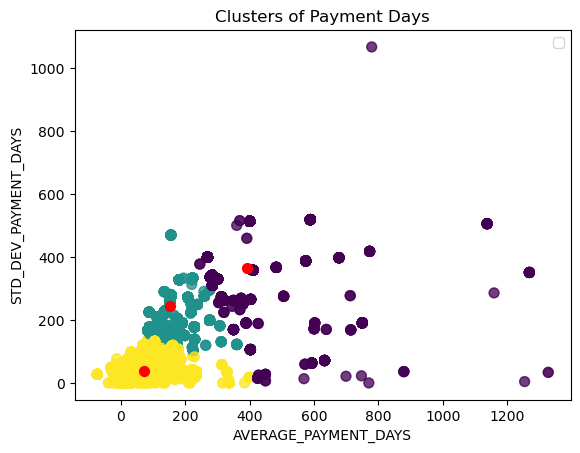

In [944]:
# Checking visually distribusion of clusters.
  
kmeans = KMeans(n_clusters=3, init='random').fit(data_rcd_kmeans)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data_rcd_kmeans['AVERAGE_PAYMENT_DAYS'], data_rcd_kmeans['STD_DEV_PAYMENT_DAYS'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.grid(False)
plt.title('Clusters of Payment Days')
plt.xlabel('AVERAGE_PAYMENT_DAYS')
plt.ylabel('STD_DEV_PAYMENT_DAYS')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

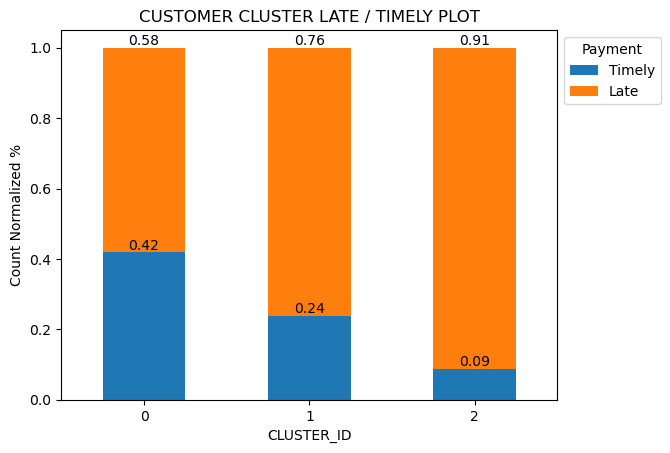

In [945]:
# Checking payment behaviour based on clusters.

category_counts = data_rcd.groupby(['CLUSTER_ID', 'TARGET']).size().unstack(fill_value=0)

# Normalize the counts by dividing by the total count for each category
category_counts_normalized = category_counts.div(category_counts.sum(axis=1), axis=0)

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
ax = category_counts_normalized.plot(kind='bar', stacked=True)
plt.title('CUSTOMER CLUSTER LATE / TIMELY PLOT')
plt.xlabel('CLUSTER_ID')
plt.ylabel('Count Normalized %')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add data values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height), ha='center', va='bottom')

# Move the legend outside of the plot's box
plt.legend(title='Payment', labels=['Timely', 'Late'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


We have made three cluster and here we can see that customers under cluster 2 are late payment masters.

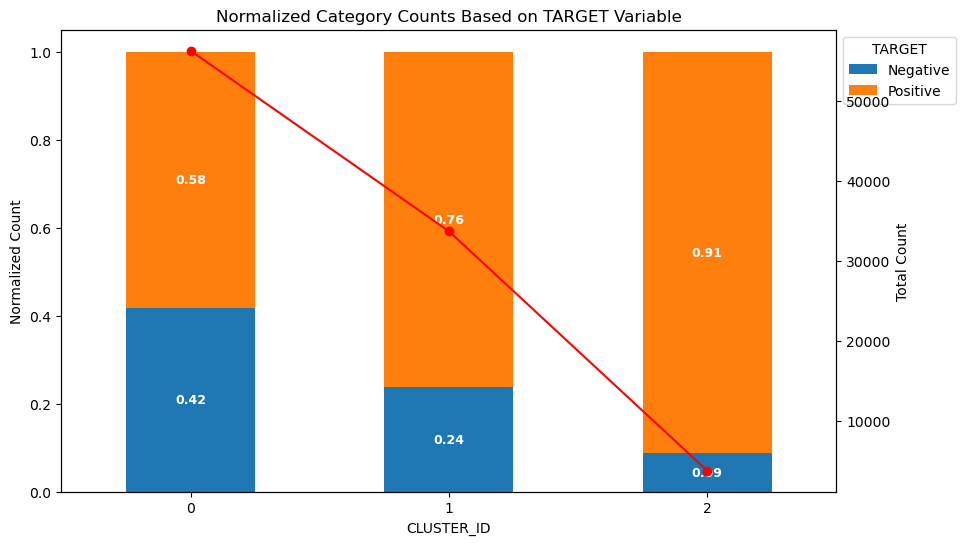

In [946]:
# Checking count of customers based on cluser. 

category_counts = data_rcd.groupby(['CLUSTER_ID', 'TARGET']).size().unstack(fill_value=0)

# Normalize the counts by dividing by the total count for each category
category_counts_normalized = category_counts.div(category_counts.sum(axis=1), axis=0)

# Calculate the counts of 'CLUSTER_ID'
cluster_counts = data_rcd['CLUSTER_ID'].value_counts().reset_index()
cluster_counts.columns = ['CLUSTER_ID', 'Total_Count']

# Create a stacked bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1 = category_counts_normalized.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Normalized Category Counts Based on TARGET Variable')
ax1.set_xlabel('CLUSTER_ID')
ax1.set_ylabel('Normalized Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Add data values on top of the bars
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax1.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white', fontweight='bold')


# Create a line plot for 'CLUSTER_ID' counts using a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(cluster_counts['CLUSTER_ID'], cluster_counts['Total_Count'], color='red', marker='o', linestyle='-', label='Total Count')
ax2.set_ylabel('Total Count')

# Move the legend outside of the plot's box
ax1.legend(title='TARGET', labels=['Negative', 'Positive'], loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


### 2. Logistic Regression

### Test-Train Split

In [947]:
# Making customer number as index so to in future to make predictions on customer level. Hence we can not drop it.

data_rcd.set_index('CUSTOMER_NUMBER', inplace=True)

In [948]:
# Importing library

from sklearn.model_selection import train_test_split

In [949]:
# Putting feature variable to X

X = data_rcd.drop(['TARGET'], axis=1)

X.head()

CUSTOMER_NAME RECEIPT_DATE    USD Amount  \
CUSTOMER_NUMBER                                            
37403               C EA Corp   2021-04-20  101018.63040   
4003                RADW Corp   2021-01-31   48990.21133   
4003                RADW Corp   2021-01-31   41991.60971   
1409                FARO Corp   2021-01-31   41991.60971   
4003                RADW Corp   2021-01-31   41991.60971   

                INVOICE_CREATION_DATE   DUE_DATE INVOICE_RANGE  PAYMENT_DAYS  \
CUSTOMER_NUMBER                                                                
37403                      2020-11-02 2020-12-30            Q2           169   
4003                       2020-12-29 2021-01-28            Q2            33   
4003                       2021-01-30 2021-03-01            Q2             1   
1409                       2020-12-15 2021-01-14            Q2            47   
4003                       2020-12-15 2021-01-14            Q2            47   

                 AVERAGE_PAYMENT_DAYS  STD_DEV_PAYMENT_DAYS  INVOICE_CLASS_DM  \
CUSTOMER_NUMBER                                                                 
37403                       99.000000             64.490309                 0   
4003                        52.588235             35.855932                 0   
4003                        52.588235             35.855932                 0   
1409                       151.501769            256.743864                 0   
4003                        52.588235             35.855932                 0   

                 INVOICE_CLASS_INV  INVOICE_CURRENCY_CODE_BHD  \
CUSTOMER_NUMBER                                                 
37403                            1                          0   
4003                             1                          0   
4003                             1                          0   
1409                             1                          0   
4003                             1                          0   

                 INVOICE_CURRENCY_CODE_EUR  INVOICE_CURRENCY_CODE_GBP  \
CUSTOMER_NUMBER                                                         
37403                                    0                          0   
4003                                     0                          0   
4003                                     0                          0   
1409                                     0                          0   
4003                                     0                          0   

                 INVOICE_CURRENCY_CODE_JOD  INVOICE_CURRENCY_CODE_KWD  \
CUSTOMER_NUMBER                                                         
37403                                    0                          0   
4003                                     0                          0   
4003                                     0                          0   
1409                                     0                          0   
4003                                     0                          0   

                 INVOICE_CURRENCY_CODE_QAR  INVOICE_CURRENCY_CODE_SAR  \
CUSTOMER_NUMBER                                                         
37403                                    0                          0   
4003                                     0                          1   
4003                                     0                          1   
1409                                     0                          1   
4003                                     0                          1   

                 INVOICE_CURRENCY_CODE_USD  INVOICE_CURRENCY_CODE_ZAR  \
CUSTOMER_NUMBER                                                         
37403                                    0                          0   
4003                                     0                          0   
4003                                     0                          0   
1409                                     0                          0   
4003                                

In [950]:
# Putting response variable to y

y = data_rcd['TARGET']

y.head()

CUSTOMER_NUMBER
37403    1
4003     1
4003     0
1409     1
4003     1
Name: TARGET, dtype: int64

### Splitting the data into train and test

In [951]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [952]:
# Importing library

from sklearn.preprocessing import StandardScaler

In [953]:
# Fitting the train model

scaler = StandardScaler()

X_train[['USD Amount']] = scaler.fit_transform(X_train[['USD Amount']])

X_train.head()

CUSTOMER_NAME RECEIPT_DATE  USD Amount INVOICE_CREATION_DATE  \
CUSTOMER_NUMBER                                                                
1888                PARF Corp   2021-01-26   -0.537047            2020-12-27   
7530                ALLI Corp   2021-04-12    0.494311            2021-03-05   
3029                CHAU Corp   2021-01-19   -0.278250            2020-12-14   
7530                ALLI Corp   2021-05-22    0.794539            2021-04-17   
15768               SEPH Corp   2021-02-18    6.589368            2020-11-19   

                  DUE_DATE INVOICE_RANGE  PAYMENT_DAYS  AVERAGE_PAYMENT_DAYS  \
CUSTOMER_NUMBER                                                                
1888            2021-01-26            Q1            30            104.136507   
7530            2021-04-30            Q4            38             44.941286   
3029            2021-02-12            Q3            36            117.666667   
7530            2021-05-30            Q4            35             44.941286   
15768           2020-11-19            Q4            91            138.138346   

                 STD_DEV_PAYMENT_DAYS  INVOICE_CLASS_DM  INVOICE_CLASS_INV  \
CUSTOMER_NUMBER                                                              
1888                        40.195282                 0                  1   
7530                        39.299671                 0                  1   
3029                       174.021377                 0                  1   
7530                        39.299671                 0                  1   
15768                      229.819959                 0                  1   

                 INVOICE_CURRENCY_CODE_BHD  INVOICE_CURRENCY_CODE_EUR  \
CUSTOMER_NUMBER                                                         
1888                                     0                          0   
7530                                     0                          0   
3029                                     0                          0   
7530                                     0                          0   
15768                                    0                          0   

                 INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_JOD  \
CUSTOMER_NUMBER                                                         
1888                                     0                          0   
7530                                     0                          0   
3029                                     0                          0   
7530                                     0                          0   
15768                                    0                          0   

                 INVOICE_CURRENCY_CODE_KWD  INVOICE_CURRENCY_CODE_QAR  \
CUSTOMER_NUMBER                                                         
1888                                     0                          0   
7530                                     0                          0   
3029                                     0                          0   
7530                                     0                          0   
15768                                    0                          0   

                 INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_USD  \
CUSTOMER_NUMBER                                                         
1888                                     0                          0   
7530                                     0                          0   
3029                                     0                          1   
7530                                     0                          0   
15768                                    0                          1   

                 INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  \
CUSTOMER_NUMBER                                                    
1888                                     0                     0   
7530                                     0                     0   
3029                       

In [954]:
X_train.columns

Index(['CUSTOMER_NAME', 'RECEIPT_DATE', 'USD Amount', 'INVOICE_CREATION_DATE',
       'DUE_DATE', 'INVOICE_RANGE', 'PAYMENT_DAYS', 'AVERAGE_PAYMENT_DAYS',
       'STD_DEV_PAYMENT_DAYS', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'INVOICE_CURRENCY_CODE_BHD', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_GBP', 'INVOICE_CURRENCY_CODE_JOD',
       'INVOICE_CURRENCY_CODE_KWD', 'INVOICE_CURRENCY_CODE_QAR',
       'INVOICE_CURRENCY_CODE_SAR', 'INVOICE_CURRENCY_CODE_USD',
       'INVOICE_CURRENCY_CODE_ZAR', 'CREDIT_TERM_<45 DAYS',
       'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS', 'CREDIT_TERM_>90 DAYS',
       'CREDIT_TERM_Advance/Immediate', 'CLUSTER_ID'],
      dtype='object')

In [955]:
# Lets drop few below columns as we have already derived features out of it or they are not important for model now.

X_train.drop(['INVOICE_RANGE','CUSTOMER_NAME','RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE','PAYMENT_DAYS','AVERAGE_PAYMENT_DAYS','STD_DEV_PAYMENT_DAYS', 'CLUSTER_ID','INVOICE_CLASS_DM'], axis=1, inplace = True)

### Looking at Correlations

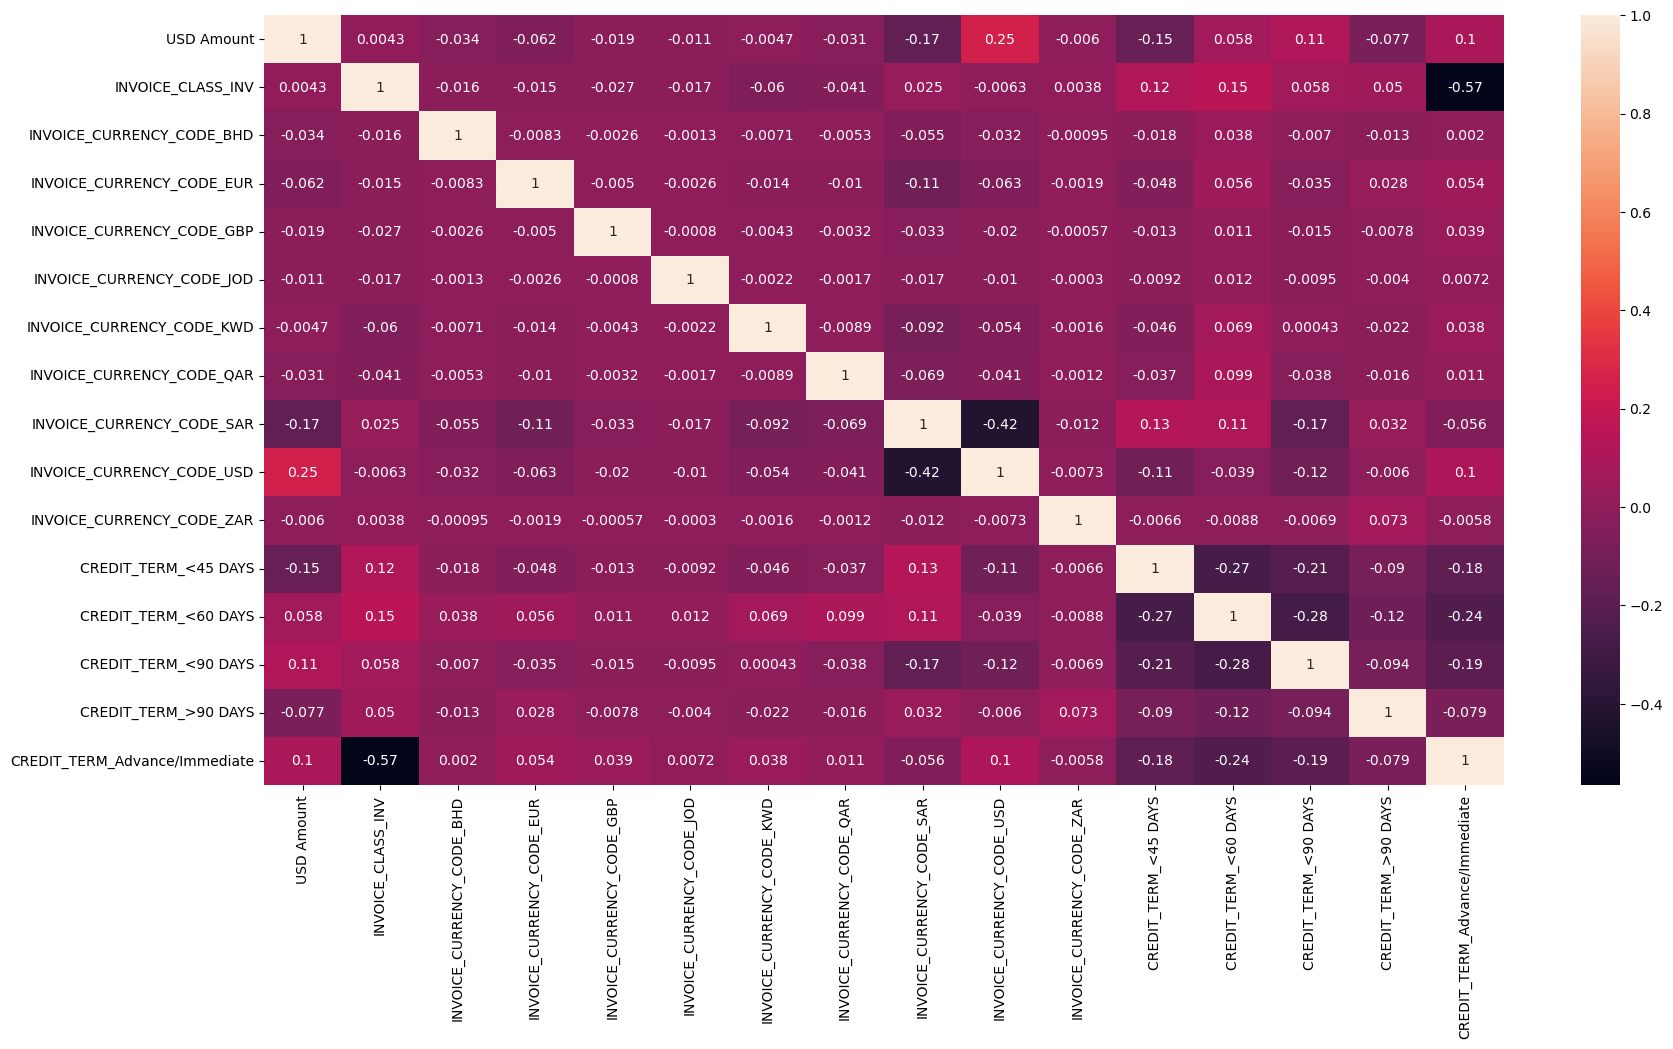

In [956]:
# Let's see the correlation matrix

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Running Your First Training Model

In [957]:
# Importing library

import statsmodels.api as sm

In [958]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65646 entries, 1888 to 15768
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   USD Amount                     65646 non-null  float64
 1   INVOICE_CLASS_INV              65646 non-null  uint8  
 2   INVOICE_CURRENCY_CODE_BHD      65646 non-null  uint8  
 3   INVOICE_CURRENCY_CODE_EUR      65646 non-null  uint8  
 4   INVOICE_CURRENCY_CODE_GBP      65646 non-null  uint8  
 5   INVOICE_CURRENCY_CODE_JOD      65646 non-null  uint8  
 6   INVOICE_CURRENCY_CODE_KWD      65646 non-null  uint8  
 7   INVOICE_CURRENCY_CODE_QAR      65646 non-null  uint8  
 8   INVOICE_CURRENCY_CODE_SAR      65646 non-null  uint8  
 9   INVOICE_CURRENCY_CODE_USD      65646 non-null  uint8  
 10  INVOICE_CURRENCY_CODE_ZAR      65646 non-null  uint8  
 11  CREDIT_TERM_<45 DAYS           65646 non-null  uint8  
 12  CREDIT_TERM_<60 DAYS           65646 non-nu

In [959]:
X_train.head()

USD Amount  INVOICE_CLASS_INV  INVOICE_CURRENCY_CODE_BHD  \
CUSTOMER_NUMBER                                                             
1888              -0.537047                  1                          0   
7530               0.494311                  1                          0   
3029              -0.278250                  1                          0   
7530               0.794539                  1                          0   
15768              6.589368                  1                          0   

                 INVOICE_CURRENCY_CODE_EUR  INVOICE_CURRENCY_CODE_GBP  \
CUSTOMER_NUMBER                                                         
1888                                     0                          0   
7530                                     0                          0   
3029                                     0                          0   
7530                                     0                          0   
15768                                    0                          0   

                 INVOICE_CURRENCY_CODE_JOD  INVOICE_CURRENCY_CODE_KWD  \
CUSTOMER_NUMBER                                                         
1888                                     0                          0   
7530                                     0                          0   
3029                                     0                          0   
7530                                     0                          0   
15768                                    0                          0   

                 INVOICE_CURRENCY_CODE_QAR  INVOICE_CURRENCY_CODE_SAR  \
CUSTOMER_NUMBER                                                         
1888                                     0                          0   
7530                                     0                          0   
3029                                     0                          0   
7530                                     0                          0   
15768                                    0                          0   

                 INVOICE_CURRENCY_CODE_USD  INVOICE_CURRENCY_CODE_ZAR  \
CUSTOMER_NUMBER                                                         
1888                                     0                          0   
7530                                     0                          0   
3029                                     1                          0   
7530                                     0                          0   
15768                                    1                          0   

                 CREDIT_TERM_<45 DAYS  CREDIT_TERM_<60 DAYS  \
CUSTOMER_NUMBER                                               
1888                                0                     0   
7530                                0                     1   
3029                                0                     1   
7530                                1                     0   
15768                               0                     0   

                 CREDIT_TERM_<90 DAYS  CREDIT_TERM_>90 DAYS  \
CUSTOMER_NUMBER                                               
1888                                0                     0   
7530                                0                     0   
3029                                0                     0   
7530                                0                     0   
15768                               0                     0   

                 CREDIT_TERM_Advance/Immediate  
CUSTOMER_NUMBER                                 
1888                                         0  
7530                                         0  
3029                                         0  
7530                                         0  
15768                                        1

In [960]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                65646
Model:                            GLM   Df Residuals:                    65629
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34192.
Date:                Mon, 11 Sep 2023   Deviance:                       68385.
Time:                        23:34:33   Pearson chi2:                 6.64e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2152
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.4032      0.102     23.660      0.000       2.204       2.602
USD Amount                       -0.1069      0.010    -10.362      0.000      -0.127      -0.087
INVOICE_CLASS_INV                -1.4013      0.098    -14.309      0.000      -1.593      -1.209
INVOICE_CURRENCY_CODE_BHD         0.0872      0.134      0.650      0.516      -0.176       0.350
INVOICE_CURRENCY_CODE_EUR        -1.0787      0.077    -14.028      0.000      -1.229      -0.928
INVOICE_CURRENCY_CODE_GBP         0.5261      0.273      1.925      0.054      -0.010       1.062
INVOICE_CURRENCY_CODE_JOD        22.7842   1.39e+04      0.002      0.999   -2.72e+04    2.73e+04
INVOICE_CURRENCY_CODE_KWD         0.6534      0.088      7.434      0.000       0.481       0.826
INVOICE_CURRENCY_CODE_QAR         0.7721      0.118      6.556      0.000       0.541       1.003
INVOICE_CURRENCY_CODE_SAR         1.1944      0.022     54.126      0.000       1.151       1.238
INVOICE_CURRENCY_CODE_USD         0.6615      0.028     24.031      0.000       0.608       0.715
INVOICE_CURRENCY_CODE_ZAR        23.8517   2.12e+04      0.001      0.999   -4.16e+04    4.16e+04
CREDIT_TERM_<45 DAYS             -1.8030      0.031    -57.245      0.000      -1.865      -1.741
CREDIT_TERM_<60 DAYS             -0.9580      0.030    -32.315      0.000      -1.016      -0.900
CREDIT_TERM_<90 DAYS             -1.8477      0.032    -58.403      0.000      -1.910      -1.786
CREDIT_TERM_>90 DAYS             -1.3315      0.049    -27.282      0.000      -1.427      -1.236
CREDIT_TERM_Advance/Immediate     1.1713      0.059     19.841      0.000       1.056       1.287
=================================================================================================
"""

### Feature Selection Using RFE

In [961]:
# Importing library

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [962]:
# Importing library
from sklearn.feature_selection import RFE
rfe = RFE (logreg , n_features_to_select = 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [963]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('USD Amount', False, 6),
 ('INVOICE_CLASS_INV', True, 1),
 ('INVOICE_CURRENCY_CODE_BHD', False, 7),
 ('INVOICE_CURRENCY_CODE_EUR', True, 1),
 ('INVOICE_CURRENCY_CODE_GBP', False, 5),
 ('INVOICE_CURRENCY_CODE_JOD', True, 1),
 ('INVOICE_CURRENCY_CODE_KWD', False, 3),
 ('INVOICE_CURRENCY_CODE_QAR', False, 2),
 ('INVOICE_CURRENCY_CODE_SAR', True, 1),
 ('INVOICE_CURRENCY_CODE_USD', False, 4),
 ('INVOICE_CURRENCY_CODE_ZAR', True, 1),
 ('CREDIT_TERM_<45 DAYS', True, 1),
 ('CREDIT_TERM_<60 DAYS', True, 1),
 ('CREDIT_TERM_<90 DAYS', True, 1),
 ('CREDIT_TERM_>90 DAYS', True, 1),
 ('CREDIT_TERM_Advance/Immediate', True, 1)]

In [964]:
col = X_train.columns[rfe.support_]

In [965]:
X_train.columns[~rfe.support_]

Index(['USD Amount', 'INVOICE_CURRENCY_CODE_BHD', 'INVOICE_CURRENCY_CODE_GBP',
       'INVOICE_CURRENCY_CODE_KWD', 'INVOICE_CURRENCY_CODE_QAR',
       'INVOICE_CURRENCY_CODE_USD'],
      dtype='object')

##### Assessing the model with StatsModels

In [966]:
col

Index(['INVOICE_CLASS_INV', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_ZAR', 'CREDIT_TERM_<45 DAYS',
       'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS', 'CREDIT_TERM_>90 DAYS',
       'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

### Second Model of logistic regression

In [967]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                65646
Model:                            GLM   Df Residuals:                    65635
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34536.
Date:                Mon, 11 Sep 2023   Deviance:                       69072.
Time:                        23:34:37   Pearson chi2:                 6.63e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2069
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.7651      0.101     27.440      0.000       2.568       2.963
INVOICE_CLASS_INV                -1.4481      0.098    -14.812      0.000      -1.640      -1.257
INVOICE_CURRENCY_CODE_EUR        -1.2814      0.076    -16.849      0.000      -1.430      -1.132
INVOICE_CURRENCY_CODE_JOD        22.5736   1.39e+04      0.002      0.999   -2.72e+04    2.72e+04
INVOICE_CURRENCY_CODE_SAR         0.9841      0.020     49.159      0.000       0.945       1.023
INVOICE_CURRENCY_CODE_ZAR        23.6172   2.12e+04      0.001      0.999   -4.16e+04    4.16e+04
CREDIT_TERM_<45 DAYS             -1.8967      0.031    -60.916      0.000      -1.958      -1.836
CREDIT_TERM_<60 DAYS             -1.0210      0.029    -35.260      0.000      -1.078      -0.964
CREDIT_TERM_<90 DAYS             -2.0554      0.030    -67.494      0.000      -2.115      -1.996
CREDIT_TERM_>90 DAYS             -1.3682      0.049    -28.191      0.000      -1.463      -1.273
CREDIT_TERM_Advance/Immediate     1.1065      0.058     19.083      0.000       0.993       1.220
=================================================================================================
"""

In [968]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

CUSTOMER_NUMBER
1888     0.788685
7530     0.573479
3029     0.573479
7530     0.359010
15768    0.918604
52500    0.573479
3927     0.573479
3409     0.573479
2795     0.908966
2315     0.788685
dtype: float64

In [969]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78868456, 0.57347948, 0.57347948, 0.35901009, 0.91860371,
       0.57347948, 0.57347948, 0.57347948, 0.90896636, 0.78868456])

##### Creating a dataframe with the actual late and the predicted probabilities

In [970]:
y_train_pred_final = pd.DataFrame({'Late':y_train.values, 'Late_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Late  Late_Prob  CustID
0     0   0.788685    1888
1     0   0.573479    7530
2     0   0.573479    3029
3     0   0.359010    7530
4     1   0.918604   15768

##### Creating new column 'predicted' with 1 if Late_Prob > 0.5 else 0

In [971]:
y_train_pred_final['predicted'] = y_train_pred_final.Late_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Late  Late_Prob  CustID  predicted
0     0   0.788685    1888          1
1     0   0.573479    7530          1
2     0   0.573479    3029          1
3     0   0.359010    7530          0
4     1   0.918604   15768          1

In [972]:
# Import library

from sklearn import metrics

In [973]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Late, y_train_pred_final.predicted )
print(confusion)

[[10894 11522]
 [ 4867 38363]]


In [974]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Late, y_train_pred_final.predicted))

0.7503427474636688


#### Checking VIFs

In [975]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [976]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4      INVOICE_CURRENCY_CODE_ZAR  1.01
2      INVOICE_CURRENCY_CODE_JOD  1.00
8           CREDIT_TERM_>90 DAYS  0.10
1      INVOICE_CURRENCY_CODE_EUR  0.02
5           CREDIT_TERM_<45 DAYS  0.02
6           CREDIT_TERM_<60 DAYS  0.02
0              INVOICE_CLASS_INV  0.01
3      INVOICE_CURRENCY_CODE_SAR  0.01
7           CREDIT_TERM_<90 DAYS  0.01
9  CREDIT_TERM_Advance/Immediate  0.00

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'INVOICE_CURRENCY_CODE_JOD' has the highest VIF. So let's start by dropping that.

In [977]:
col = col.drop(['INVOICE_CURRENCY_CODE_JOD'], 1)
col

Index(['INVOICE_CLASS_INV', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_SAR', 'INVOICE_CURRENCY_CODE_ZAR',
       'CREDIT_TERM_<45 DAYS', 'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS',
       'CREDIT_TERM_>90 DAYS', 'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

In [978]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                65646
Model:                            GLM   Df Residuals:                    65636
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34545.
Date:                Mon, 11 Sep 2023   Deviance:                       69091.
Time:                        23:34:38   Pearson chi2:                 6.63e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2067
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.7676      0.101     27.465      0.000       2.570       2.965
INVOICE_CLASS_INV                -1.4496      0.098    -14.827      0.000      -1.641      -1.258
INVOICE_CURRENCY_CODE_EUR        -1.2828      0.076    -16.870      0.000      -1.432      -1.134
INVOICE_CURRENCY_CODE_SAR         0.9829      0.020     49.105      0.000       0.944       1.022
INVOICE_CURRENCY_CODE_ZAR        22.6167   1.29e+04      0.002      0.999   -2.52e+04    2.53e+04
CREDIT_TERM_<45 DAYS             -1.8970      0.031    -60.930      0.000      -1.958      -1.836
CREDIT_TERM_<60 DAYS             -1.0197      0.029    -35.224      0.000      -1.076      -0.963
CREDIT_TERM_<90 DAYS             -2.0561      0.030    -67.521      0.000      -2.116      -1.996
CREDIT_TERM_>90 DAYS             -1.3686      0.049    -28.201      0.000      -1.464      -1.273
CREDIT_TERM_Advance/Immediate     1.1060      0.058     19.074      0.000       0.992       1.220
=================================================================================================
"""

In [979]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [980]:
y_train_pred[:10]

array([0.78884572, 0.57401645, 0.57401645, 0.35916415, 0.91864048,
       0.57401645, 0.57401645, 0.57401645, 0.90894887, 0.78884572])

In [981]:
y_train_pred_final['Late_Prob'] = y_train_pred

In [982]:
# Creating new column 'predicted' with 1 if Late_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Late_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Late  Late_Prob  CustID  predicted
0     0   0.788846    1888          1
1     0   0.574016    7530          1
2     0   0.574016    3029          1
3     0   0.359164    7530          0
4     1   0.918640   15768          1

In [983]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Late, y_train_pred_final.predicted))

0.7503427474636688


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [984]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3      INVOICE_CURRENCY_CODE_ZAR  1.01
7           CREDIT_TERM_>90 DAYS  0.10
1      INVOICE_CURRENCY_CODE_EUR  0.02
4           CREDIT_TERM_<45 DAYS  0.02
5           CREDIT_TERM_<60 DAYS  0.02
0              INVOICE_CLASS_INV  0.01
2      INVOICE_CURRENCY_CODE_SAR  0.01
6           CREDIT_TERM_<90 DAYS  0.01
8  CREDIT_TERM_Advance/Immediate  0.00

In [985]:
# Let's drop another feature from above results

col = col.drop(['INVOICE_CURRENCY_CODE_ZAR'], 1)
col

Index(['INVOICE_CLASS_INV', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_SAR', 'CREDIT_TERM_<45 DAYS',
       'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS', 'CREDIT_TERM_>90 DAYS',
       'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

In [986]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                65646
Model:                            GLM   Df Residuals:                    65637
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34555.
Date:                Mon, 11 Sep 2023   Deviance:                       69111.
Time:                        23:34:39   Pearson chi2:                 6.63e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2064
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.7683      0.101     27.471      0.000       2.571       2.966
INVOICE_CLASS_INV                -1.4500      0.098    -14.831      0.000      -1.642      -1.258
INVOICE_CURRENCY_CODE_EUR        -1.2843      0.076    -16.893      0.000      -1.433      -1.135
INVOICE_CURRENCY_CODE_SAR         0.9816      0.020     49.048      0.000       0.942       1.021
CREDIT_TERM_<45 DAYS             -1.8965      0.031    -60.921      0.000      -1.958      -1.836
CREDIT_TERM_<60 DAYS             -1.0194      0.029    -35.216      0.000      -1.076      -0.963
CREDIT_TERM_<90 DAYS             -2.0560      0.030    -67.524      0.000      -2.116      -1.996
CREDIT_TERM_>90 DAYS             -1.3555      0.048    -27.981      0.000      -1.450      -1.261
CREDIT_TERM_Advance/Immediate     1.1061      0.058     19.075      0.000       0.992       1.220
=================================================================================================
"""

In [987]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [988]:
y_train_pred[:10]

array([0.7888977 , 0.57416186, 0.57416186, 0.35933586, 0.91866544,
       0.57416186, 0.57416186, 0.57416186, 0.90886596, 0.7888977 ])

In [989]:
y_train_pred_final['Late_Prob'] = y_train_pred

In [990]:
# Creating new column 'predicted' with 1 if late_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Late_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Late  Late_Prob  CustID  predicted
0     0   0.788898    1888          1
1     0   0.574162    7530          1
2     0   0.574162    3029          1
3     0   0.359336    7530          0
4     1   0.918665   15768          1

In [991]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Late, y_train_pred_final.predicted))

0.7501294823751637


##### Let's now check the VIFs again

In [992]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6           CREDIT_TERM_>90 DAYS  0.10
1      INVOICE_CURRENCY_CODE_EUR  0.02
3           CREDIT_TERM_<45 DAYS  0.02
4           CREDIT_TERM_<60 DAYS  0.02
0              INVOICE_CLASS_INV  0.01
2      INVOICE_CURRENCY_CODE_SAR  0.01
5           CREDIT_TERM_<90 DAYS  0.01
7  CREDIT_TERM_Advance/Immediate  0.00

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

-----------------------------------------------------------------------------------------------------------------------

### Last logistic regression model

In [993]:
# Let's drop another feature also 

col = col.drop('INVOICE_CLASS_INV')
col

Index(['INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_SAR',
       'CREDIT_TERM_<45 DAYS', 'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS',
       'CREDIT_TERM_>90 DAYS', 'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

In [994]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                65646
Model:                            GLM   Df Residuals:                    65638
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34701.
Date:                Mon, 11 Sep 2023   Deviance:                       69402.
Time:                        23:34:39   Pearson chi2:                 6.71e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2029
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.3158      0.024     55.423      0.000       1.269       1.362
INVOICE_CURRENCY_CODE_EUR        -1.2930      0.076    -16.986      0.000      -1.442      -1.144
INVOICE_CURRENCY_CODE_SAR         1.0107      0.020     50.693      0.000       0.972       1.050
CREDIT_TERM_<45 DAYS             -1.9105      0.031    -61.285      0.000      -1.972      -1.849
CREDIT_TERM_<60 DAYS             -1.0289      0.029    -35.512      0.000      -1.086      -0.972
CREDIT_TERM_<90 DAYS             -2.0205      0.030    -66.747      0.000      -2.080      -1.961
CREDIT_TERM_>90 DAYS             -1.3644      0.049    -28.128      0.000      -1.459      -1.269
CREDIT_TERM_Advance/Immediate     1.5026      0.055     27.098      0.000       1.394       1.611
=================================================================================================
"""

In [995]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [996]:
y_train_pred[:10]

array([0.78848179, 0.57123754, 0.57123754, 0.35555148, 0.94366293,
       0.57123754, 0.57123754, 0.57123754, 0.91104549, 0.78848179])

In [997]:
y_train_pred_final['Late_Prob'] = y_train_pred

In [998]:
# Creating new column 'predicted' with 1 if late_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Late_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Late  Late_Prob  CustID  predicted
0     0   0.788482    1888          1
1     0   0.571238    7530          1
2     0   0.571238    3029          1
3     0   0.355551    7530          0
4     1   0.943663   15768          1

In [999]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Late, y_train_pred_final.predicted))

0.7501294823751637


##### Let's now check the VIFs again

In [1000]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5           CREDIT_TERM_>90 DAYS  0.09
0      INVOICE_CURRENCY_CODE_EUR  0.02
2           CREDIT_TERM_<45 DAYS  0.02
1      INVOICE_CURRENCY_CODE_SAR  0.01
3           CREDIT_TERM_<60 DAYS  0.01
4           CREDIT_TERM_<90 DAYS  0.01
6  CREDIT_TERM_Advance/Immediate  0.00

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [1001]:
col

Index(['INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_SAR',
       'CREDIT_TERM_<45 DAYS', 'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS',
       'CREDIT_TERM_>90 DAYS', 'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

------------------------------------------------------------------------------------------------------------------------------

## Metrics beyond simply accuracy

In [1002]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1003]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8874161461947722

In [1004]:
# Let us calculate specificity
TN / float(TN+FP)

0.48599214846538186

In [1005]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.5140078515346181


In [1006]:
# positive predictive value 
print (TP / float(TP+FP))

0.769028766162173


In [1007]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6911997969671975


In [1008]:
# Recall predictive value
print (TP / float(FN+ TP))

0.8874161461947722


###  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1009]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1010]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Late, y_train_pred_final.Late_Prob, drop_intermediate = False )

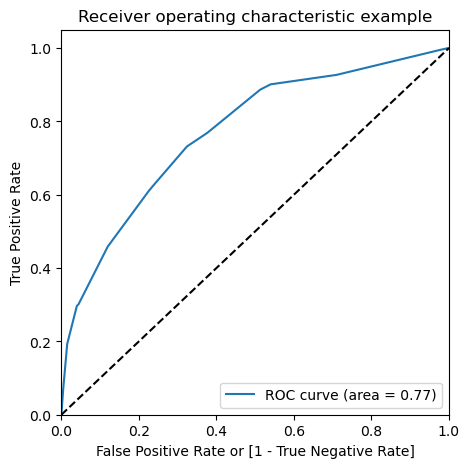

In [1011]:
draw_roc(y_train_pred_final.Late, y_train_pred_final.Late_Prob)

#### Finding optimal cutoff probability

In [1012]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Late_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Late  Late_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0     0   0.788482    1888          1    1    1    1    1    1    1    1    1   
1     0   0.571238    7530          1    1    1    1    1    1    1    0    0   
2     0   0.571238    3029          1    1    1    1    1    1    1    0    0   
3     0   0.355551    7530          0    1    1    1    1    0    0    0    0   
4     1   0.943663   15768          1    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    1    1

In [1013]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Late, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.658532  1.000000  0.000000
0.1   0.1  0.658532  1.000000  0.000000
0.2   0.2  0.659004  0.999121  0.003078
0.3   0.3  0.662691  0.995374  0.021101
0.4   0.4  0.750495  0.901064  0.460118
0.5   0.5  0.750129  0.887092  0.485992
0.6   0.6  0.712595  0.731529  0.676080
0.7   0.7  0.674329  0.630835  0.758208
0.8   0.8  0.524769  0.301272  0.955791
0.9   0.9  0.523246  0.296715  0.960118


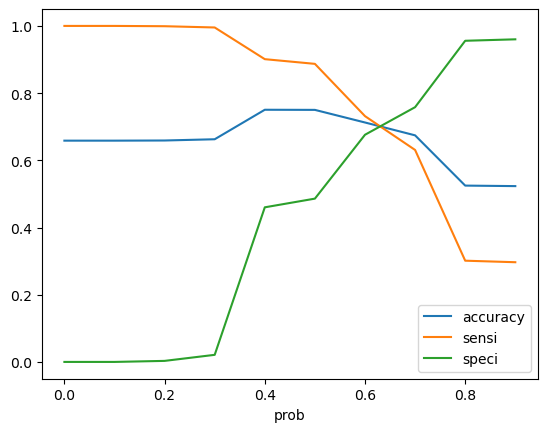

In [1014]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.65 is the optimum point to take it as a cutoff probability.

In [1015]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Late_Prob.map( lambda x: 1 if x > 0.65 else 0)

y_train_pred_final.head()

Late  Late_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0     0   0.788482    1888          1    1    1    1    1    1    1    1    1   
1     0   0.571238    7530          1    1    1    1    1    1    1    0    0   
2     0   0.571238    3029          1    1    1    1    1    1    1    0    0   
3     0   0.355551    7530          0    1    1    1    1    0    0    0    0   
4     1   0.943663   15768          1    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    0    0                1  
1    0    0                0  
2    0    0                0  
3    0    0                0  
4    1    1                1

In [1016]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Late, y_train_pred_final.final_predicted)

0.6743289766322396

In [1017]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Late, y_train_pred_final.final_predicted )
confusion2

array([[16996,  5420],
       [15959, 27271]], dtype=int64)

In [1018]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1019]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6308350682396484

In [1020]:
# Let us calculate specificity
TN / float(TN+FP)

0.7582084225553176

In [1021]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.24179157744468238


In [1022]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8342051329111988


In [1023]:
# Negative predictive value
print (TN / float(TN+ FN))

0.5157335760886057


In [1024]:
# Let us calculate precision
TP / float(FP+TP)

0.8342051329111988

In [1025]:
# Let us calculate recall
TP / float(FN+TP)

0.6308350682396484

### Precision and recall tradeoff

In [1026]:
from sklearn.metrics import precision_recall_curve

In [1027]:
y_train_pred_final.Late, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        1
         ..
 65641    0
 65642    1
 65643    1
 65644    1
 65645    1
 Name: Late, Length: 65646, dtype: int64,
 0        1
 1        1
 2        1
 3        0
 4        1
         ..
 65641    1
 65642    0
 65643    1
 65644    0
 65645    1
 Name: predicted, Length: 65646, dtype: int64)

In [1028]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Late, y_train_pred_final.Late_Prob)

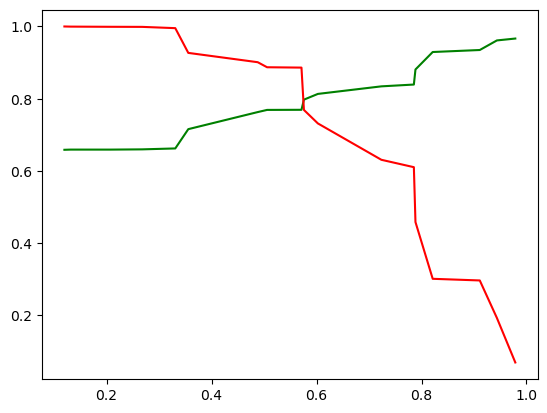

In [1029]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From above graph we can see that best trade is 0.6 so for prediction on open invoices we can consider this cut off.

### Making predictions on the test set

In [1030]:
X_test[['USD Amount']] = scaler.transform(X_test[['USD Amount']])

In [1031]:
col

Index(['INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_SAR',
       'CREDIT_TERM_<45 DAYS', 'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS',
       'CREDIT_TERM_>90 DAYS', 'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

In [1032]:
# Deriving new dataframe with only relevent features.

X_test = X_test[col]
X_test.head()

INVOICE_CURRENCY_CODE_EUR  INVOICE_CURRENCY_CODE_SAR  \
CUSTOMER_NUMBER                                                         
38032                                    0                          1   
7530                                     0                          0   
7567                                     0                          0   
3274                                     0                          0   
15768                                    0                          1   

                 CREDIT_TERM_<45 DAYS  CREDIT_TERM_<60 DAYS  \
CUSTOMER_NUMBER                                               
38032                               0                     0   
7530                                0                     0   
7567                                0                     0   
3274                                0                     0   
15768                               0                     0   

                 CREDIT_TERM_<90 DAYS  CREDIT_TERM_>90 DAYS  \
CUSTOMER_NUMBER                                               
38032                               0                     0   
7530                                0                     0   
7567                                0                     0   
3274                                0                     1   
15768                               0                     0   

                 CREDIT_TERM_Advance/Immediate  
CUSTOMER_NUMBER                                 
38032                                        0  
7530                                         1  
7567                                         1  
3274                                         0  
15768                                        0

In [1033]:
# Adding constant to test data set.

X_test_sm = sm.add_constant(X_test)

<!-- Making predictions on the test set -->

In [1034]:
# Making prediction on test data set.

y_test_pred = res.predict(X_test_sm)

In [1035]:
y_test_pred[:10]

CUSTOMER_NUMBER
38032    0.911045
7530     0.943663
7567     0.943663
3274     0.487853
15768    0.911045
2315     0.330766
15768    0.785426
29420    0.788482
7530     0.571238
39507    0.943663
dtype: float64

In [1036]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1037]:
# Let's see the head
y_pred_1.head()

0
CUSTOMER_NUMBER          
38032            0.911045
7530             0.943663
7567             0.943663
3274             0.487853
15768            0.911045

In [1038]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1039]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [1040]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1041]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1042]:
# Renaming the Targrt column for better understanding.
y_pred_final.rename(columns={'TARGET': 'Late'}, inplace=True)

In [1043]:
y_pred_final.head()

Late  CustID         0
0     1   38032  0.911045
1     1    7530  0.943663
2     1    7567  0.943663
3     1    3274  0.487853
4     1   15768  0.911045

In [1044]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Late_Prob'})

In [1045]:
column_order = ['CustID', 'Late', 'Late_Prob']

In [1046]:
# Rearranging the columns

y_pred_final = y_pred_final[column_order]

In [1047]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Late  Late_Prob
0   38032     1   0.911045
1    7530     1   0.943663
2    7567     1   0.943663
3    3274     1   0.487853
4   15768     1   0.911045

In [1048]:
# Using cut off of 0.6 for probability to make final predictions.

y_pred_final['final_predicted'] = y_pred_final.Late_Prob.map(lambda x: 1 if x > 0.6 else 0)

In [1049]:
y_pred_final.head()

CustID  Late  Late_Prob  final_predicted
0   38032     1   0.911045                1
1    7530     1   0.943663                1
2    7567     1   0.943663                1
3    3274     1   0.487853                0
4   15768     1   0.911045                1

In [1050]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Late, y_pred_final.final_predicted)

0.7154078549848942

In [1051]:
# Deriving confusion metrix.
confusion2 = metrics.confusion_matrix(y_pred_final.Late, y_pred_final.final_predicted )
confusion2

array([[ 6447,  3038],
       [ 4969, 13681]], dtype=int64)

In [1052]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1053]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7335656836461126

In [1054]:
# Let us calculate specificity
TN / float(TN+FP)

0.6797047970479705

In [1055]:
# Let us calculate precision
TP / float(FP+TP)

0.8182905676176805

In [1056]:
# Let us calculate recall
TP / float(FN+TP)

0.7335656836461126

In [1057]:
y_train_pred_final.head()

Late  Late_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0     0   0.788482    1888          1    1    1    1    1    1    1    1    1   
1     0   0.571238    7530          1    1    1    1    1    1    1    0    0   
2     0   0.571238    3029          1    1    1    1    1    1    1    0    0   
3     0   0.355551    7530          0    1    1    1    1    0    0    0    0   
4     1   0.943663   15768          1    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    0    0                1  
1    0    0                0  
2    0    0                0  
3    0    0                0  
4    1    1                1

In [1058]:
# Saving final results.
y_train_pred_cust_level = y_train_pred_final[['CustID','Late','Late_Prob']]
y_train_pred_cust_level.head()

CustID  Late  Late_Prob
0    1888     0   0.788482
1    7530     0   0.571238
2    3029     0   0.571238
3    7530     0   0.355551
4   15768     1   0.943663

In [1059]:
# Calculate average probabiltya at customer level
y_train_pred_cust_level = y_train_pred_cust_level.groupby('CustID')['Late_Prob'].mean()
y_train_pred_cust_level.head()

CustID
1044    0.623867
1076    0.787752
1146    0.343807
1154    0.652558
1192    0.551611
Name: Late_Prob, dtype: float64

In [1060]:
y_train_pred_cust_level = y_train_pred_cust_level.to_frame()
y_train_pred_cust_level.head()

Late_Prob
CustID           
1044     0.623867
1076     0.787752
1146     0.343807
1154     0.652558
1192     0.551611

In [1061]:
# Using cut off of 0.6 for probability to make predictions.

y_train_pred_cust_level['predicted'] = y_train_pred_cust_level.Late_Prob.map(lambda x: 1 if x > 0.6 else 0)

In [1062]:
y_train_pred_cust_level.head()

Late_Prob  predicted
CustID                      
1044     0.623867          1
1076     0.787752          1
1146     0.343807          0
1154     0.652558          1
1192     0.551611          0

In [1063]:
# Reset index of customer ID and making it column again.
y_train_pred_cust_level.reset_index(inplace=True)

In [1064]:
# Drop late payment as we have prediction column.
y_train_pred_cust_level.drop('Late_Prob', axis=1, inplace=True)

In [1065]:
y_train_pred_cust_level.head()

CustID  predicted
0    1044          1
1    1076          1
2    1146          0
3    1154          1
4    1192          0

In [1066]:
# Renaming customer ID with customer account no to match with open invoice data.
y_train_pred_cust_level.rename(columns={'CustID': 'Customer Account No'}, inplace=True)

In [1067]:
col

Index(['INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_SAR',
       'CREDIT_TERM_<45 DAYS', 'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS',
       'CREDIT_TERM_>90 DAYS', 'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

### Prepairing Open Invoice data for Predictions to make

In [1068]:
# Saving data frame.

data_open2 = data_open

In [1069]:
# Renaming data columns to match with model.

data_open2.rename(columns={'Transaction Class': 'INVOICE_CLASS','Transaction Currency':'INVOICE_CURRENCY_CODE'}, inplace=True)

In [1070]:
data_rcd.head()

CUSTOMER_NAME RECEIPT_DATE    USD Amount  \
CUSTOMER_NUMBER                                            
37403               C EA Corp   2021-04-20  101018.63040   
4003                RADW Corp   2021-01-31   48990.21133   
4003                RADW Corp   2021-01-31   41991.60971   
1409                FARO Corp   2021-01-31   41991.60971   
4003                RADW Corp   2021-01-31   41991.60971   

                INVOICE_CREATION_DATE   DUE_DATE  TARGET INVOICE_RANGE  \
CUSTOMER_NUMBER                                                          
37403                      2020-11-02 2020-12-30       1            Q2   
4003                       2020-12-29 2021-01-28       1            Q2   
4003                       2021-01-30 2021-03-01       0            Q2   
1409                       2020-12-15 2021-01-14       1            Q2   
4003                       2020-12-15 2021-01-14       1            Q2   

                 PAYMENT_DAYS  AVERAGE_PAYMENT_DAYS  STD_DEV_PAYMENT_DAYS  \
CUSTOMER_NUMBER                                                             
37403                     169             99.000000             64.490309   
4003                       33             52.588235             35.855932   
4003                        1             52.588235             35.855932   
1409                       47            151.501769            256.743864   
4003                       47             52.588235             35.855932   

                 INVOICE_CLASS_DM  INVOICE_CLASS_INV  \
CUSTOMER_NUMBER                                        
37403                           0                  1   
4003                            0                  1   
4003                            0                  1   
1409                            0                  1   
4003                            0                  1   

                 INVOICE_CURRENCY_CODE_BHD  INVOICE_CURRENCY_CODE_EUR  \
CUSTOMER_NUMBER                                                         
37403                                    0                          0   
4003                                     0                          0   
4003                                     0                          0   
1409                                     0                          0   
4003                                     0                          0   

                 INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_JOD  \
CUSTOMER_NUMBER                                                         
37403                                    0                          0   
4003                                     0                          0   
4003                                     0                          0   
1409                                     0                          0   
4003                                     0                          0   

                 INVOICE_CURRENCY_CODE_KWD  INVOICE_CURRENCY_CODE_QAR  \
CUSTOMER_NUMBER                                                         
37403                                    0                          0   
4003                                     0                          0   
4003                                     0                          0   
1409                                     0                          0   
4003                                     0                          0   

                 INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_USD  \
CUSTOMER_NUMBER                                                         
37403                                    0                          0   
4003                                     1                          0   
4003                                     1                          0   
1409                                     1                          0   
4003                                     1                          0   

                 INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  \
CUSTOMER_NUMBER            

In [1071]:
data_open2['INVOICE_CLASS'].value_counts()

INVOICE        79523
CREDIT NOTE     5954
PAYMENT         1443
DEBIT NOTE      1284
Name: INVOICE_CLASS, dtype: int64

In [1072]:
data_open2.head()

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
0  04-APR-2022 01:07:01      3rd Party     GIVE Corp              49144.0   
1  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
2  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
3  04-APR-2022 01:07:01  Related Party     AL R Corp              23312.0   
4  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   

  Transaction Number Transaction Date           Payment Term    Due Date  \
0       100210000438       21/12/2021              Immediate  21/12/2021   
1       100220000052       01/02/2022  30 Days from Inv Date  03/03/2022   
2       100220000143       24/03/2022  30 Days from Inv Date  23/04/2022   
3       100220000001       04/01/2022  15 Days from Inv Date  19/01/2022   
4       100220000105       03/03/2022       30 Days from EOM  30/04/2022   

  INVOICE_CURRENCY_CODE Local Amount INVOICE_CLASS  AGE USD Amount  \
0                   AED       -3,088   CREDIT NOTE  105     -3,088   
1                   USD        2,000       INVOICE   33      2,000   
2                   USD        2,000       INVOICE  -18      2,000   
3                   AED        2,415       INVOICE   76      2,415   
4                   AED        3,800       INVOICE  -25      3,800   

  INV_CREATION_DATE  
0  12/21/2021 12:53  
1    2/1/2022 14:09  
2   3/24/2022 17:46  
3    1/5/2022 11:49  
4    3/3/2022 22:30

In [1073]:
# Changing data type to appropriate data type.

data_open2['Due Date']=data_open2['Due Date'].astype('datetime64')

In [1074]:
# Changing data type to appropriate data type.

data_open2['Transaction Date']=data_open2['Transaction Date'].astype('datetime64')

In [1075]:
# Changing data type to appropriate data type.

data_open2['INV_CREATION_DATE'] = pd.to_datetime(data_open2['INV_CREATION_DATE']).dt.date

In [1076]:
# Changing data type to appropriate data type.

data_open2['INV_CREATION_DATE']=data_open2['INV_CREATION_DATE'].astype('datetime64')

In [1077]:
data_open2['USD Amount'] = data_open2['USD Amount'].str.replace(',', '').astype('int')


In [1078]:
data_open2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AS_OF_DATE             88204 non-null  object        
 1   Customer Type          88204 non-null  object        
 2   Customer_Name          88204 non-null  object        
 3   Customer Account No    88201 non-null  float64       
 4   Transaction Number     88195 non-null  object        
 5   Transaction Date       88204 non-null  datetime64[ns]
 6   Payment Term           88204 non-null  object        
 7   Due Date               88204 non-null  datetime64[ns]
 8   INVOICE_CURRENCY_CODE  88204 non-null  object        
 9   Local Amount           88204 non-null  object        
 10  INVOICE_CLASS          88204 non-null  object        
 11  AGE                    88204 non-null  int64         
 12  USD Amount             88204 non-null  int32         
 13  I

In [1079]:
# Deriving new features to match with model made on received payment dataset.

data_open2['CREDIT_DAYS'] = data_open2['Due Date'] - data_open2['INV_CREATION_DATE']

In [1080]:
# Changing data type to appropriate data type.

data_open2['CREDIT_DAYS']= data_open2['CREDIT_DAYS'].dt.days

In [1081]:
# Making similar bins of credit term as of model.

data_open2['CREDIT_TERM'] = pd.cut(data_open2['CREDIT_DAYS'], bins=bins, labels=['<30 DAYS', '<45 DAYS', '<60 DAYS','<90 DAYS','>90 DAYS'])

In [1082]:
# Changing data type to appropriate data type.

data_open2['CREDIT_TERM'] = data_open2['CREDIT_TERM'].astype(str)

In [1083]:
# Imputing Nan values to Advance or Immediate as it was zero or negative values.

data_open2['CREDIT_TERM'] = data_open2['CREDIT_TERM'].replace('nan', 'Advance/Immediate')

In [1084]:
data_open2.head()

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
0  04-APR-2022 01:07:01      3rd Party     GIVE Corp              49144.0   
1  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
2  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
3  04-APR-2022 01:07:01  Related Party     AL R Corp              23312.0   
4  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   

  Transaction Number Transaction Date           Payment Term   Due Date  \
0       100210000438       2021-12-21              Immediate 2021-12-21   
1       100220000052       2022-01-02  30 Days from Inv Date 2022-03-03   
2       100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
3       100220000001       2022-04-01  15 Days from Inv Date 2022-01-19   
4       100220000105       2022-03-03       30 Days from EOM 2022-04-30   

  INVOICE_CURRENCY_CODE Local Amount INVOICE_CLASS  AGE  USD Amount  \
0                   AED       -3,088   CREDIT NOTE  105       -3088   
1                   USD        2,000       INVOICE   33        2000   
2                   USD        2,000       INVOICE  -18        2000   
3                   AED        2,415       INVOICE   76        2415   
4                   AED        3,800       INVOICE  -25        3800   

  INV_CREATION_DATE  CREDIT_DAYS        CREDIT_TERM  
0        2021-12-21            0  Advance/Immediate  
1        2022-02-01           30           <30 DAYS  
2        2022-03-24           30           <30 DAYS  
3        2022-01-05           14           <30 DAYS  
4        2022-03-03           58           <60 DAYS

In [1085]:
# A positive value in the AGE column clearly indicates that the payment is already overdue. So, there is nothing to predict.

data_open2 = data_open2[data_open2['AGE']<0]
data_open2.shape

(28080, 16)

In [1086]:
# Convert into dummies

data_dummies = pd.get_dummies(data_open2[['INVOICE_CLASS','INVOICE_CURRENCY_CODE','CREDIT_TERM']], drop_first=True)
data_dummies.head()

INVOICE_CLASS_INVOICE  INVOICE_CLASS_PAYMENT  INVOICE_CURRENCY_CODE_BHD  \
2                      1                      0                          0   
4                      1                      0                          0   
5                      1                      0                          0   
6                      1                      0                          0   
7                      1                      0                          0   

   INVOICE_CURRENCY_CODE_EGP  INVOICE_CURRENCY_CODE_EUR  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_HKD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_JOD  INVOICE_CURRENCY_CODE_KWD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_OMR  INVOICE_CURRENCY_CODE_QAR  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_SGD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_USD  INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  \
2                          1                          0                     0   
4                          0                          0                     0   
5                          0                          0                     0   
6                          0                          0                     0   
7                          0                          0                     0   

   CREDIT_TERM_<60 DAYS  CREDIT_TERM_<90 DAYS  CREDIT_TERM_>90 DAYS  \
2                     0                     0                     0   
4                     1                     0                     0   
5                     1                     0                     0   
6                     1                     0                     0   
7                     1                     0                     0   

   CREDIT_TERM_Advance/Immediate  
2                              0  
4                              0  
5                              0  
6                              0  
7                              0

In [1087]:
# Create dummy variables using the 'get_dummies'

leads_dum = pd.concat([data_open2, data_dummies], axis=1)
leads_dum

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
2      04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
4      04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
5      04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
6      04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
7      04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
...                     ...            ...           ...                  ...   
88172  04-APR-2022 01:07:01      3rd Party     MIDD Corp              20867.0   
88186  04-APR-2022 01:07:01      3rd Party     SAUD Corp              23136.0   
88187  04-APR-2022 01:07:01      3rd Party     SAUD Corp              23136.0   
88188  04-APR-2022 01:07:01      3rd Party     SAUD Corp              23136.0   
88189  04-APR-2022 01:07:01      3rd Party     SAUD Corp              23136.0   

      Transaction Number Transaction Date           Payment Term   Due Date  \
2           100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
4           100220000105       2022-03-03       30 Days from EOM 2022-04-30   
5           100220000106       2022-03-03       30 Days from EOM 2022-04-30   
6           100220000124       2022-03-15       30 Days from EOM 2022-04-30   
7           100220000125       2022-03-15       30 Days from EOM 2022-04-30   
...                  ...              ...                    ...        ...   
88172       165220000039       2022-03-30  60 Days from Inv Date 2022-05-29   
88186       165220000032       2022-07-03  60 Days from Inv Date 2022-06-05   
88187       165220000034       2022-03-17  60 Days from Inv Date 2022-05-16   
88188       165220000035       2022-03-18  60 Days from Inv Date 2022-05-17   
88189       165220000041       2022-03-31  60 Days from Inv Date 2022-05-30   

      INVOICE_CURRENCY_CODE Local Amount INVOICE_CLASS  AGE  USD Amount  \
2                       USD        2,000       INVOICE  -18        2000   
4                       AED        3,800       INVOICE  -25        3800   
5                       AED        1,264       INVOICE  -25        1264   
6                       AED       25,858       INVOICE  -25       25858   
7                       AED       39,873       INVOICE  -25       39873   
...                     ...          ...           ...  ...         ...   
88172                   USD        3,435       INVOICE  -54        3435   
88186                   USD      114,039       INVOICE  -31      114039   
88187                   USD       32,138       INVOICE  -41       32138   
88188                   USD       26,764       INVOICE  -42       26764   
88189                   USD      147,421       INVOICE  -55      147421   

      INV_CREATION_DATE  CREDIT_DAYS CREDIT_TERM  INVOICE_CLASS_INVOICE  \
2            2022-03-24           30    <30 DAYS                      1   
4            2022-03-03           58    <60 DAYS                      1   
5            2022-03-03           58    <60 DAYS                      1   
6            2022-03-15           46    <60 DAYS                      1   
7            2022-03-15           46    <60 DAYS                      1   
...                 ...          ...         ...                    ...   
88172        2022-03-30           60    <60 DAYS                      1   
88186        2022-03-07           90    <90 DAYS                      1   
88187        2022-03-17           60    <60 DAYS                      1   
88188        2022-03-18           60    <60 DAYS                      1   
88189        2022-03-31           60    <60 DAYS                      1   

       INVOICE_CLASS_PAYMENT  INVOICE_CURRENCY_CODE_BHD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0  

In [1088]:
leads_dum.head()

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
2  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
4  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
5  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
6  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
7  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   

  Transaction Number Transaction Date           Payment Term   Due Date  \
2       100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
4       100220000105       2022-03-03       30 Days from EOM 2022-04-30   
5       100220000106       2022-03-03       30 Days from EOM 2022-04-30   
6       100220000124       2022-03-15       30 Days from EOM 2022-04-30   
7       100220000125       2022-03-15       30 Days from EOM 2022-04-30   

  INVOICE_CURRENCY_CODE Local Amount INVOICE_CLASS  AGE  USD Amount  \
2                   USD        2,000       INVOICE  -18        2000   
4                   AED        3,800       INVOICE  -25        3800   
5                   AED        1,264       INVOICE  -25        1264   
6                   AED       25,858       INVOICE  -25       25858   
7                   AED       39,873       INVOICE  -25       39873   

  INV_CREATION_DATE  CREDIT_DAYS CREDIT_TERM  INVOICE_CLASS_INVOICE  \
2        2022-03-24           30    <30 DAYS                      1   
4        2022-03-03           58    <60 DAYS                      1   
5        2022-03-03           58    <60 DAYS                      1   
6        2022-03-15           46    <60 DAYS                      1   
7        2022-03-15           46    <60 DAYS                      1   

   INVOICE_CLASS_PAYMENT  INVOICE_CURRENCY_CODE_BHD  \
2                      0                          0   
4                      0                          0   
5                      0                          0   
6                      0                          0   
7                      0                          0   

   INVOICE_CURRENCY_CODE_EGP  INVOICE_CURRENCY_CODE_EUR  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_HKD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_JOD  INVOICE_CURRENCY_CODE_KWD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_OMR  INVOICE_CURRENCY_CODE_QAR  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_SGD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_USD  INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  \
2                          1                          0   

#### Dropping the repeated variables

In [1089]:
# We have created dummies for the below variables, so we can drop them

data_open2 = leads_dum.drop(['INVOICE_CLASS','INVOICE_CURRENCY_CODE','CREDIT_TERM'], 1)


In [1090]:
data_open2.head()

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
2  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
4  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
5  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
6  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
7  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   

  Transaction Number Transaction Date           Payment Term   Due Date  \
2       100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
4       100220000105       2022-03-03       30 Days from EOM 2022-04-30   
5       100220000106       2022-03-03       30 Days from EOM 2022-04-30   
6       100220000124       2022-03-15       30 Days from EOM 2022-04-30   
7       100220000125       2022-03-15       30 Days from EOM 2022-04-30   

  Local Amount  AGE  USD Amount INV_CREATION_DATE  CREDIT_DAYS  \
2        2,000  -18        2000        2022-03-24           30   
4        3,800  -25        3800        2022-03-03           58   
5        1,264  -25        1264        2022-03-03           58   
6       25,858  -25       25858        2022-03-15           46   
7       39,873  -25       39873        2022-03-15           46   

   INVOICE_CLASS_INVOICE  INVOICE_CLASS_PAYMENT  INVOICE_CURRENCY_CODE_BHD  \
2                      1                      0                          0   
4                      1                      0                          0   
5                      1                      0                          0   
6                      1                      0                          0   
7                      1                      0                          0   

   INVOICE_CURRENCY_CODE_EGP  INVOICE_CURRENCY_CODE_EUR  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_HKD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_JOD  INVOICE_CURRENCY_CODE_KWD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_OMR  INVOICE_CURRENCY_CODE_QAR  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_SGD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_USD  INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  \
2                          1                          0                     0   
4                          0                          0                     0   
5                          0                          0                     0   
6                          0                          0                     0   
7                          0                         

In [1091]:
col

Index(['INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_SAR',
       'CREDIT_TERM_<45 DAYS', 'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS',
       'CREDIT_TERM_>90 DAYS', 'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

In [1092]:
data_open2.head()

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
2  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
4  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
5  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
6  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   
7  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   

  Transaction Number Transaction Date           Payment Term   Due Date  \
2       100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
4       100220000105       2022-03-03       30 Days from EOM 2022-04-30   
5       100220000106       2022-03-03       30 Days from EOM 2022-04-30   
6       100220000124       2022-03-15       30 Days from EOM 2022-04-30   
7       100220000125       2022-03-15       30 Days from EOM 2022-04-30   

  Local Amount  AGE  USD Amount INV_CREATION_DATE  CREDIT_DAYS  \
2        2,000  -18        2000        2022-03-24           30   
4        3,800  -25        3800        2022-03-03           58   
5        1,264  -25        1264        2022-03-03           58   
6       25,858  -25       25858        2022-03-15           46   
7       39,873  -25       39873        2022-03-15           46   

   INVOICE_CLASS_INVOICE  INVOICE_CLASS_PAYMENT  INVOICE_CURRENCY_CODE_BHD  \
2                      1                      0                          0   
4                      1                      0                          0   
5                      1                      0                          0   
6                      1                      0                          0   
7                      1                      0                          0   

   INVOICE_CURRENCY_CODE_EGP  INVOICE_CURRENCY_CODE_EUR  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_GBP  INVOICE_CURRENCY_CODE_HKD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_JOD  INVOICE_CURRENCY_CODE_KWD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_OMR  INVOICE_CURRENCY_CODE_QAR  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_SAR  INVOICE_CURRENCY_CODE_SGD  \
2                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   

   INVOICE_CURRENCY_CODE_USD  INVOICE_CURRENCY_CODE_ZAR  CREDIT_TERM_<45 DAYS  \
2                          1                          0                     0   
4                          0                          0                     0   
5                          0                          0                     0   
6                          0                          0                     0   
7                          0                         

In [1093]:
# Setting customer account no as index.

data_open2.set_index('Customer Account No', inplace=True)

In [1094]:
col

Index(['INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_SAR',
       'CREDIT_TERM_<45 DAYS', 'CREDIT_TERM_<60 DAYS', 'CREDIT_TERM_<90 DAYS',
       'CREDIT_TERM_>90 DAYS', 'CREDIT_TERM_Advance/Immediate'],
      dtype='object')

In [1095]:
# Deriving same features into invocie dataframe of as of model.

data_open2 = data_open2[col]

In [1096]:
data_open2.head()

INVOICE_CURRENCY_CODE_EUR  INVOICE_CURRENCY_CODE_SAR  \
Customer Account No                                                         
23152.0                                      0                          0   
7530.0                                       0                          0   
7530.0                                       0                          0   
7530.0                                       0                          0   
7530.0                                       0                          0   

                     CREDIT_TERM_<45 DAYS  CREDIT_TERM_<60 DAYS  \
Customer Account No                                               
23152.0                                 0                     0   
7530.0                                  0                     1   
7530.0                                  0                     1   
7530.0                                  0                     1   
7530.0                                  0                     1   

                     CREDIT_TERM_<90 DAYS  CREDIT_TERM_>90 DAYS  \
Customer Account No                                               
23152.0                                 0                     0   
7530.0                                  0                     0   
7530.0                                  0                     0   
7530.0                                  0                     0   
7530.0                                  0                     0   

                     CREDIT_TERM_Advance/Immediate  
Customer Account No                                 
23152.0                                          0  
7530.0                                           0  
7530.0                                           0  
7530.0                                           0  
7530.0                                           0

In [1097]:
data_open2.shape

(28080, 7)

### Making Predictions on open invoice data

In [1098]:
# adding constant to open invoice data

df_open_sm = sm.add_constant(data_open2)

<!-- Making predictions on the test set -->

In [1099]:
df_open_sm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 28080 entries, 23152.0 to 23136.0
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          28080 non-null  float64
 1   INVOICE_CURRENCY_CODE_EUR      28080 non-null  uint8  
 2   INVOICE_CURRENCY_CODE_SAR      28080 non-null  uint8  
 3   CREDIT_TERM_<45 DAYS           28080 non-null  uint8  
 4   CREDIT_TERM_<60 DAYS           28080 non-null  uint8  
 5   CREDIT_TERM_<90 DAYS           28080 non-null  uint8  
 6   CREDIT_TERM_>90 DAYS           28080 non-null  uint8  
 7   CREDIT_TERM_Advance/Immediate  28080 non-null  uint8  
dtypes: float64(1), uint8(7)
memory usage: 630.7 KB


In [1100]:
# Predicting the data

y_open_pred = res.predict(df_open_sm)

In [1101]:
y_open_pred.head()

Customer Account No
23152.0    0.788482
7530.0     0.571238
7530.0     0.571238
7530.0     0.571238
7530.0     0.571238
dtype: float64

In [1102]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_open_pred)

In [1103]:
# Let's see the head

y_pred_1.head()

0
Customer Account No          
23152.0              0.788482
7530.0               0.571238
7530.0               0.571238
7530.0               0.571238
7530.0               0.571238

In [1104]:
# Renaming the columns from 0 to Late_Prob

y_pred_final= y_pred_1.rename(columns={ 0 : 'Late_Prob'})

In [1105]:
y_pred_final.head()

Late_Prob
Customer Account No           
23152.0               0.788482
7530.0                0.571238
7530.0                0.571238
7530.0                0.571238
7530.0                0.571238

In [1106]:
# Making customer account no to column again

y_pred_final.reset_index(inplace=True)

In [1107]:
y_pred_final.head()

Customer Account No  Late_Prob
0              23152.0   0.788482
1               7530.0   0.571238
2               7530.0   0.571238
3               7530.0   0.571238
4               7530.0   0.571238

In [1108]:
# Grouping the customers based on thier late payment prediction probability

y_open_pred_cust_level = y_pred_final.groupby('Customer Account No')['Late_Prob'].mean()
y_open_pred_cust_level.head()

Customer Account No
1044.0    0.485315
1076.0    0.718102
1146.0    0.330766
1154.0    0.582312
1192.0    0.355551
Name: Late_Prob, dtype: float64

In [1109]:
# Coverting array into dataframes

y_open_pred_cust_level = pd.DataFrame(y_open_pred_cust_level)
y_open_pred_cust_level.head()

Late_Prob
Customer Account No           
1044.0                0.485315
1076.0                0.718102
1146.0                0.330766
1154.0                0.582312
1192.0                0.355551

In [1110]:
# Making customer account no to column again

y_open_pred_cust_level.reset_index(inplace=True)

In [1111]:
y_open_pred_cust_level.head()

Customer Account No  Late_Prob
0               1044.0   0.485315
1               1076.0   0.718102
2               1146.0   0.330766
3               1154.0   0.582312
4               1192.0   0.355551

In [1112]:
# Creating final prediction based on cut off of 0.6 from Precision Recall trade off.

y_open_pred_cust_level['final_predicted'] = y_open_pred_cust_level.Late_Prob.map(lambda x: 1 if x > 0.60 else 0)

In [1113]:
y_open_pred_cust_level.head()

Customer Account No  Late_Prob  final_predicted
0               1044.0   0.485315                0
1               1076.0   0.718102                1
2               1146.0   0.330766                0
3               1154.0   0.582312                0
4               1192.0   0.355551                0

In [1114]:
# Drop Late_Pred as we have derived final prediction column.

y_open_pred_cust_level.drop('Late_Prob', axis=1, inplace=True)

In [1115]:
# Removing any null into dataset.

data_open_final = data_open[~data_open['Customer Account No'].isnull()]

In [1116]:
# coverting dataframe into proper type.

y_open_pred_cust_level['Customer Account No'] = y_open_pred_cust_level['Customer Account No'].astype(int)

In [1117]:
y_open_pred_cust_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Account No  778 non-null    int32
 1   final_predicted      778 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 9.2 KB


In [1118]:
data_open.head()

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
0  04-APR-2022 01:07:01      3rd Party     GIVE Corp              49144.0   
1  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
2  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
3  04-APR-2022 01:07:01  Related Party     AL R Corp              23312.0   
4  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   

  Transaction Number Transaction Date           Payment Term   Due Date  \
0       100210000438       2021-12-21              Immediate 2021-12-21   
1       100220000052       2022-01-02  30 Days from Inv Date 2022-03-03   
2       100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
3       100220000001       2022-04-01  15 Days from Inv Date 2022-01-19   
4       100220000105       2022-03-03       30 Days from EOM 2022-04-30   

  INVOICE_CURRENCY_CODE Local Amount INVOICE_CLASS  AGE  USD Amount  \
0                   AED       -3,088   CREDIT NOTE  105       -3088   
1                   USD        2,000       INVOICE   33        2000   
2                   USD        2,000       INVOICE  -18        2000   
3                   AED        2,415       INVOICE   76        2415   
4                   AED        3,800       INVOICE  -25        3800   

  INV_CREATION_DATE  CREDIT_DAYS        CREDIT_TERM  
0        2021-12-21            0  Advance/Immediate  
1        2022-02-01           30           <30 DAYS  
2        2022-03-24           30           <30 DAYS  
3        2022-01-05           14           <30 DAYS  
4        2022-03-03           58           <60 DAYS

In [1119]:
# coverting dataframe into proper type.

data_open_final['Customer Account No'] = data_open_final['Customer Account No'].astype(int)

In [1120]:
data_open_final.shape

(88201, 16)

In [1121]:
# Removing null values

data_open_final = data_open_final[~data_open_final['Customer Account No'].isnull()]

In [1122]:
data_open_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88201 entries, 0 to 88203
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AS_OF_DATE             88201 non-null  object        
 1   Customer Type          88201 non-null  object        
 2   Customer_Name          88201 non-null  object        
 3   Customer Account No    88201 non-null  int32         
 4   Transaction Number     88192 non-null  object        
 5   Transaction Date       88201 non-null  datetime64[ns]
 6   Payment Term           88201 non-null  object        
 7   Due Date               88201 non-null  datetime64[ns]
 8   INVOICE_CURRENCY_CODE  88201 non-null  object        
 9   Local Amount           88201 non-null  object        
 10  INVOICE_CLASS          88201 non-null  object        
 11  AGE                    88201 non-null  int64         
 12  USD Amount             88201 non-null  int32         
 13  I

In [1123]:
# Merging two dataframes based on Customer account number.

data_open_predicted_final = data_open_final.merge(y_open_pred_cust_level, on='Customer Account No', how='left')

In [1124]:
data_open_predicted_final.head()

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
0  04-APR-2022 01:07:01      3rd Party     GIVE Corp                49144   
1  04-APR-2022 01:07:01  Related Party     AL J Corp                23152   
2  04-APR-2022 01:07:01  Related Party     AL J Corp                23152   
3  04-APR-2022 01:07:01  Related Party     AL R Corp                23312   
4  04-APR-2022 01:07:01  Related Party     ALLI Corp                 7530   

  Transaction Number Transaction Date           Payment Term   Due Date  \
0       100210000438       2021-12-21              Immediate 2021-12-21   
1       100220000052       2022-01-02  30 Days from Inv Date 2022-03-03   
2       100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
3       100220000001       2022-04-01  15 Days from Inv Date 2022-01-19   
4       100220000105       2022-03-03       30 Days from EOM 2022-04-30   

  INVOICE_CURRENCY_CODE Local Amount INVOICE_CLASS  AGE  USD Amount  \
0                   AED       -3,088   CREDIT NOTE  105       -3088   
1                   USD        2,000       INVOICE   33        2000   
2                   USD        2,000       INVOICE  -18        2000   
3                   AED        2,415       INVOICE   76        2415   
4                   AED        3,800       INVOICE  -25        3800   

  INV_CREATION_DATE  CREDIT_DAYS        CREDIT_TERM  final_predicted  
0        2021-12-21            0  Advance/Immediate              0.0  
1        2022-02-01           30           <30 DAYS              1.0  
2        2022-03-24           30           <30 DAYS              1.0  
3        2022-01-05           14           <30 DAYS              0.0  
4        2022-03-03           58           <60 DAYS              0.0

In [1125]:
data_open_predicted_final['CREDIT_TERM']

0        Advance/Immediate
1                 <30 DAYS
2                 <30 DAYS
3                 <30 DAYS
4                 <60 DAYS
               ...        
88196    Advance/Immediate
88197    Advance/Immediate
88198             <45 DAYS
88199             <60 DAYS
88200             <60 DAYS
Name: CREDIT_TERM, Length: 88201, dtype: object

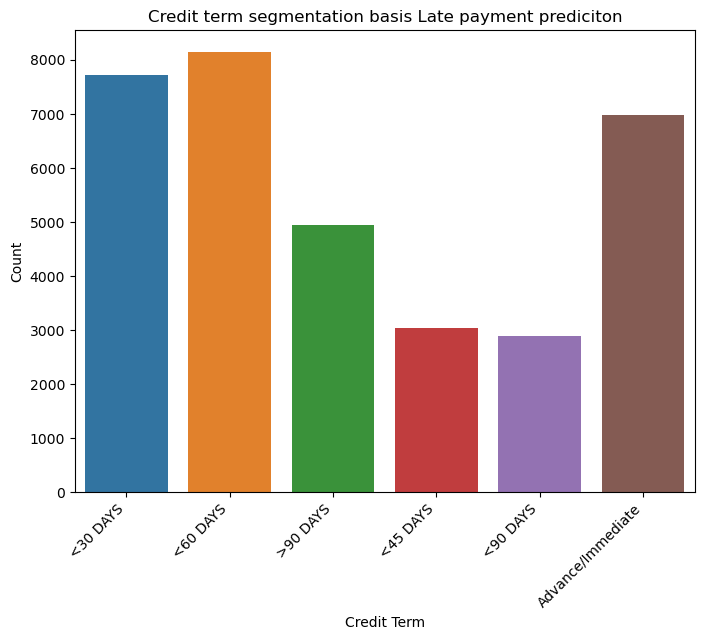

In [1126]:
# Checking customer payment behaviour based on credit term for open invoices.

filtered_df = data_open_predicted_final[data_open_predicted_final['final_predicted'] == 1]

# Create a bar plot for the 'Payment Term' column
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.countplot(x='CREDIT_TERM', data=filtered_df)
plt.title('Credit term segmentation basis Late payment prediciton')
plt.xlabel('Credit Term')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels if needed for better readability
plt.show()

- Need to focus more on Advance or Immediate payment terms as they are likely to delay.

In [1127]:
# Finding number of customers those who may delay a payment.

list_customer_no_late = filtered_df['Customer Account No'].unique()
list_customer = list_customer_no_late.shape[0]

In [1128]:
# Total number of customer available for open invoices.

list_customer_no_total = data_open_predicted_final['Customer Account No'].unique().shape[0]
list_customer_no_total

1399

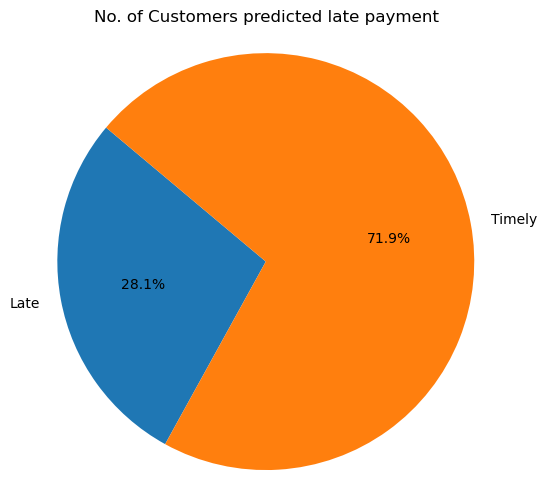

In [1129]:
# Visualizing the customer who may make late payment.

labels = ['Late', 'Timely']
values = [list_customer,(list_customer_no_total-list_customer)]
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Optional: Add a title
plt.title('No. of Customers predicted late payment')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [1130]:
# list of open invoices as above predicted for late payment

df_customers_late = data_open_predicted_final[data_open_predicted_final['Customer Account No'].isin(list_customer_no_late)]
df_customers_late.head()

AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
1   04-APR-2022 01:07:01  Related Party     AL J Corp                23152   
2   04-APR-2022 01:07:01  Related Party     AL J Corp                23152   
17  04-APR-2022 01:07:01  Related Party     ARAB Corp                 3685   
18  04-APR-2022 01:07:01  Related Party     CG B Corp                44143   
23  04-APR-2022 01:07:01  Related Party     CHAU Corp                 4013   

   Transaction Number Transaction Date           Payment Term   Due Date  \
1        100220000052       2022-01-02  30 Days from Inv Date 2022-03-03   
2        100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
17       100220000123       2022-03-15       30 Days from EOM 2022-04-30   
18       100220000145       2022-03-25  30 Days from Inv Date 2022-04-24   
23       100210000400       2021-07-12  30 Days from Inv Date 2022-06-01   

   INVOICE_CURRENCY_CODE Local Amount INVOICE_CLASS  AGE  USD Amount  \
1                    USD        2,000       INVOICE   33        2000   
2                    USD        2,000       INVOICE  -18        2000   
17                   USD       17,317       INVOICE  -25       17317   
18                   AED       13,615    DEBIT NOTE  -19       13615   
23                   AED        4,107       INVOICE   89        4107   

   INV_CREATION_DATE  CREDIT_DAYS CREDIT_TERM  final_predicted  
1         2022-02-01           30    <30 DAYS              1.0  
2         2022-03-24           30    <30 DAYS              1.0  
17        2022-03-15           46    <60 DAYS              1.0  
18        2022-03-29           26    <30 DAYS              1.0  
23        2021-12-07          176    >90 DAYS              1.0

In [1131]:
df_customers_late.shape

(33729, 17)

### 3: Decision Tree Model

In [1132]:
# Import library

from sklearn.tree import DecisionTreeRegressor

In [1133]:
# Import library

from sklearn.tree import DecisionTreeClassifier

In [1134]:
# Defining model as Decision Tree

dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

#### Fit the DT model

In [1135]:
# Train Test split of dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1136]:
# Dropping unwanted features

X_train.drop(['INVOICE_RANGE','CUSTOMER_NAME','RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE'], axis=1, inplace = True)

In [1137]:
# Dropping unwanted features

X_test.drop(['INVOICE_RANGE','CUSTOMER_NAME','RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE'], axis=1, inplace = True)

In [1138]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65646 entries, 1888 to 15768
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   USD Amount                     65646 non-null  float64
 1   PAYMENT_DAYS                   65646 non-null  int64  
 2   AVERAGE_PAYMENT_DAYS           65646 non-null  float64
 3   STD_DEV_PAYMENT_DAYS           65646 non-null  float64
 4   INVOICE_CLASS_DM               65646 non-null  uint8  
 5   INVOICE_CLASS_INV              65646 non-null  uint8  
 6   INVOICE_CURRENCY_CODE_BHD      65646 non-null  uint8  
 7   INVOICE_CURRENCY_CODE_EUR      65646 non-null  uint8  
 8   INVOICE_CURRENCY_CODE_GBP      65646 non-null  uint8  
 9   INVOICE_CURRENCY_CODE_JOD      65646 non-null  uint8  
 10  INVOICE_CURRENCY_CODE_KWD      65646 non-null  uint8  
 11  INVOICE_CURRENCY_CODE_QAR      65646 non-null  uint8  
 12  INVOICE_CURRENCY_CODE_SAR      65646 non-nu

In [1139]:
# Fit the model on DT.

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

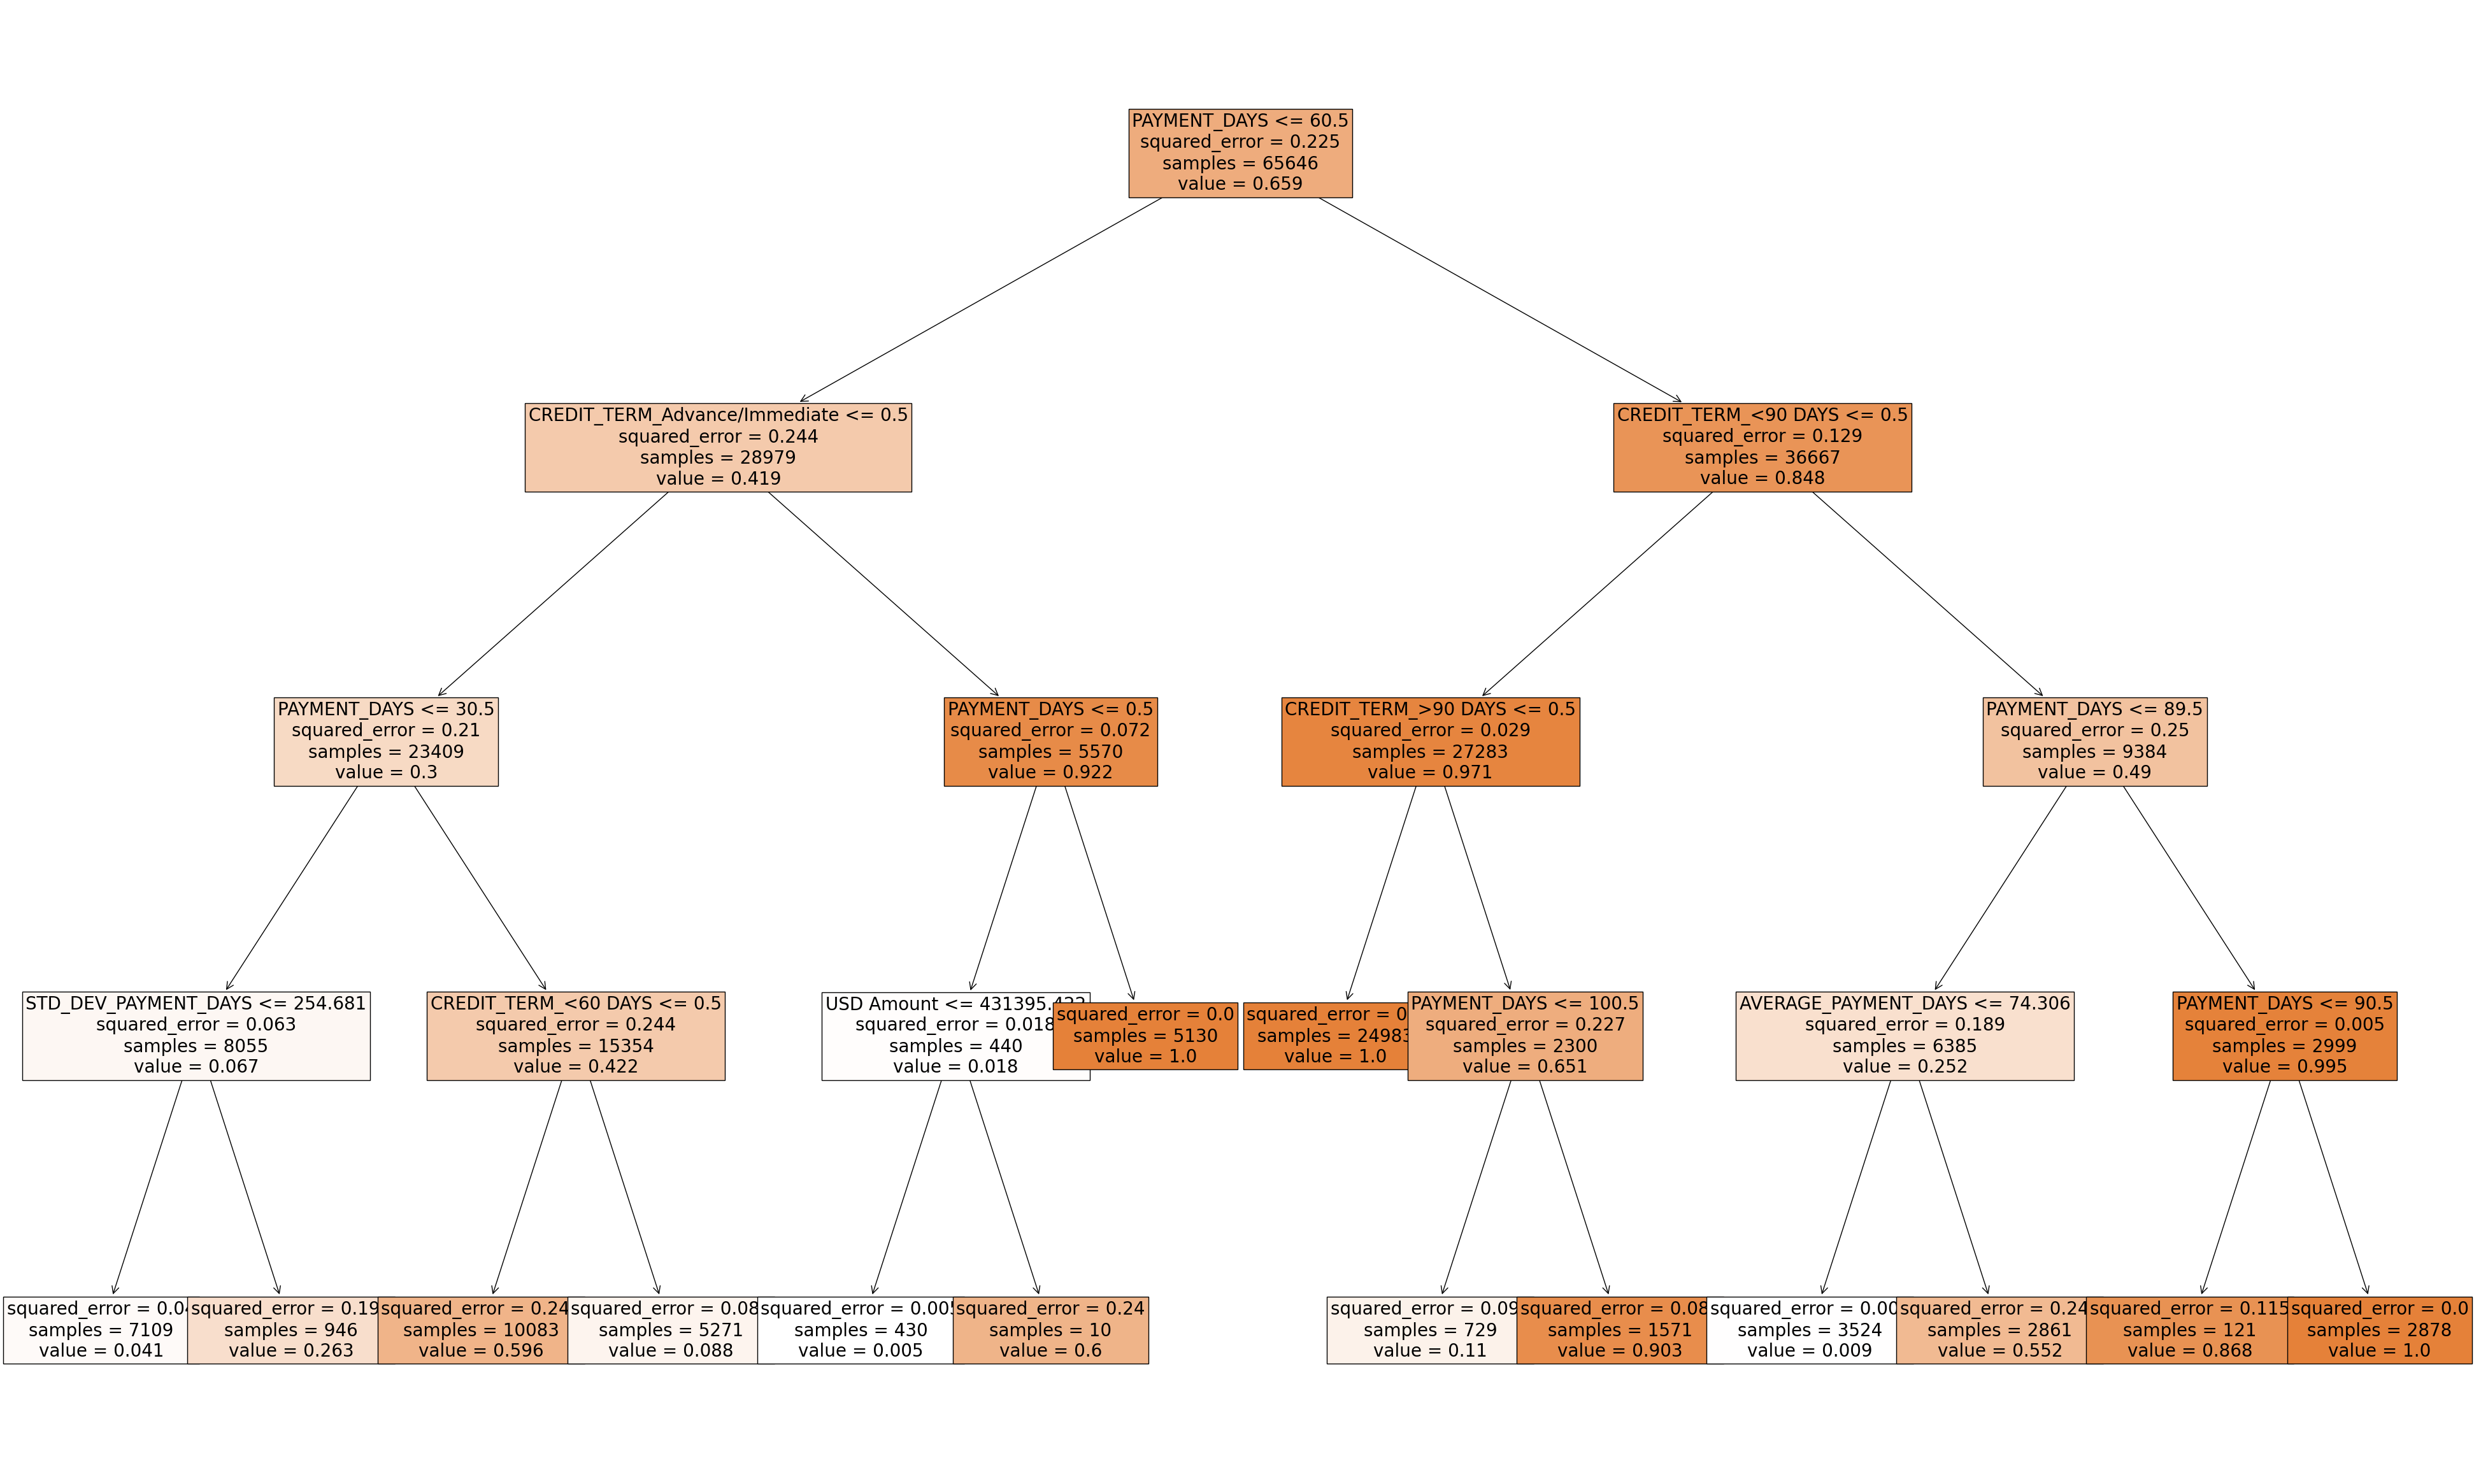

In [1140]:
# Plot the first DT wihtout tunning any hyperparameter

from sklearn.tree import plot_tree
plt.figure(figsize=(50,30))
plot_tree(dt, feature_names = X_train.columns,filled=True, fontsize=20);


In [1141]:
# Import Library for finging r2 score.

from sklearn.metrics import r2_score

In [1142]:
# Making prediciton of train dataset.

y_train_pred = dt.predict(X_train)

In [1143]:
# Finding r2 score.

r2_score(y_train, y_train_pred)

0.7097111795442649

In [1144]:
# Making prediction on 

y_test_pred = dt.predict(X_test)

In [1145]:
# Finding r2 score on test data.

r2_score(y_test, y_test_pred)

0.711698272923731

There is huge difference in r2 scores of train and test prediction. Hence we will tune the hyperparamters.

### Hyper-parameter tuning

In [1146]:
# Defining model

dt = DecisionTreeClassifier(random_state=42)

In [1147]:
# Import library for GridSearch

from sklearn.model_selection import GridSearchCV

In [1148]:
# Create the parameter grid based on the results of random search 

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [500, 1000, 2000, 5000, 10000],
    'criterion': ["gini", "entropy"]
}

In [1149]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [1150]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 12 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [500, 1000, 2000, 5000, 10000]},
             scoring='accuracy', verbose=1)

In [1151]:
# Making dataframe for gridsearch results

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.198028      0.010211         0.016278        0.001875   
1       0.185507      0.008452         0.016649        0.005018   
2       0.177978      0.014885         0.022084        0.006864   
3       0.120950      0.012417         0.016036        0.000930   
4       0.125333      0.007456         0.014937        0.001314   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                    500   
1            gini               2                   1000   
2            gini               2                   2000   
3            gini               2                   5000   
4            gini               2                  10000   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.802401   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.802401   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.802401   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.741104   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.738971   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.805569           0.801962           0.807385         0.804329   
1           0.805569           0.801962           0.807385         0.804329   
2           0.805569           0.801962           0.807385         0.804329   
3           0.743419           0.739260           0.744805         0.742147   
4           0.741896           0.734325           0.734751         0.737486   

   std_test_score  rank_test_score  
0        0.002247               25  
1        0.002247               25  
2        0.002247               25  
3        0.002128               39  
4        0.003128               41

In [1152]:
# Finding best top 5 models

score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       0.261831      0.006506         0.018025        0.002036   
20       0.296968      0.017675         0.020380        0.004313   
40       0.288105      0.027550         0.023131        0.003814   
45       0.293832      0.029773         0.017281        0.002378   
16       0.299129      0.029543         0.017456        0.002625   

   param_criterion param_max_depth param_min_samples_leaf  \
15            gini              10                    500   
20            gini              20                    500   
40         entropy              10                    500   
45         entropy              20                    500   
16            gini              10                   1000   

                                               params  split0_test_score  \
15  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.954241   
20  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.954241   
40  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.951986   
45  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.951986   
16  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.936205   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
15           0.952474           0.953446           0.955883         0.954011   
20           0.952474           0.953446           0.955883         0.954011   
40           0.945467           0.952044           0.953446         0.950736   
45           0.945467           0.952044           0.953446         0.950736   
16           0.940044           0.940771           0.938090         0.938778   

    std_test_score  rank_test_score  
15        0.001249                1  
20        0.001249                1  
40        0.003098                3  
45        0.003098                3  
16        0.001780                5

In [1153]:
# Getting Best estimator

grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=500, random_state=42)

In [1154]:
dt_best = grid_search.best_estimator_

In [1155]:
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=500, random_state=42)

In [1156]:
# import confusion metrix library

from sklearn.metrics import confusion_matrix, accuracy_score

In [1157]:
# Defining function for evaluatoin model

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [1158]:
evaluate_model(dt_best)

Train Accuracy : 0.9565700880480151
Train Confusion Matrix:
[[21980   436]
 [ 2415 40815]]
--------------------------------------------------
Test Accuracy : 0.9565310111960192
Test Confusion Matrix:
[[ 9289   196]
 [ 1027 17623]]


- Accuracy score for both train and test are 95% which is very very high.

In [1159]:
# Import library for classification_report

from sklearn.metrics import classification_report

In [1160]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9485
           1       0.99      0.94      0.97     18650

    accuracy                           0.96     28135
   macro avg       0.94      0.96      0.95     28135
weighted avg       0.96      0.96      0.96     28135



- All params are more than 90% score, those are very high.
- With this estimator DT is likely to be overfitting.

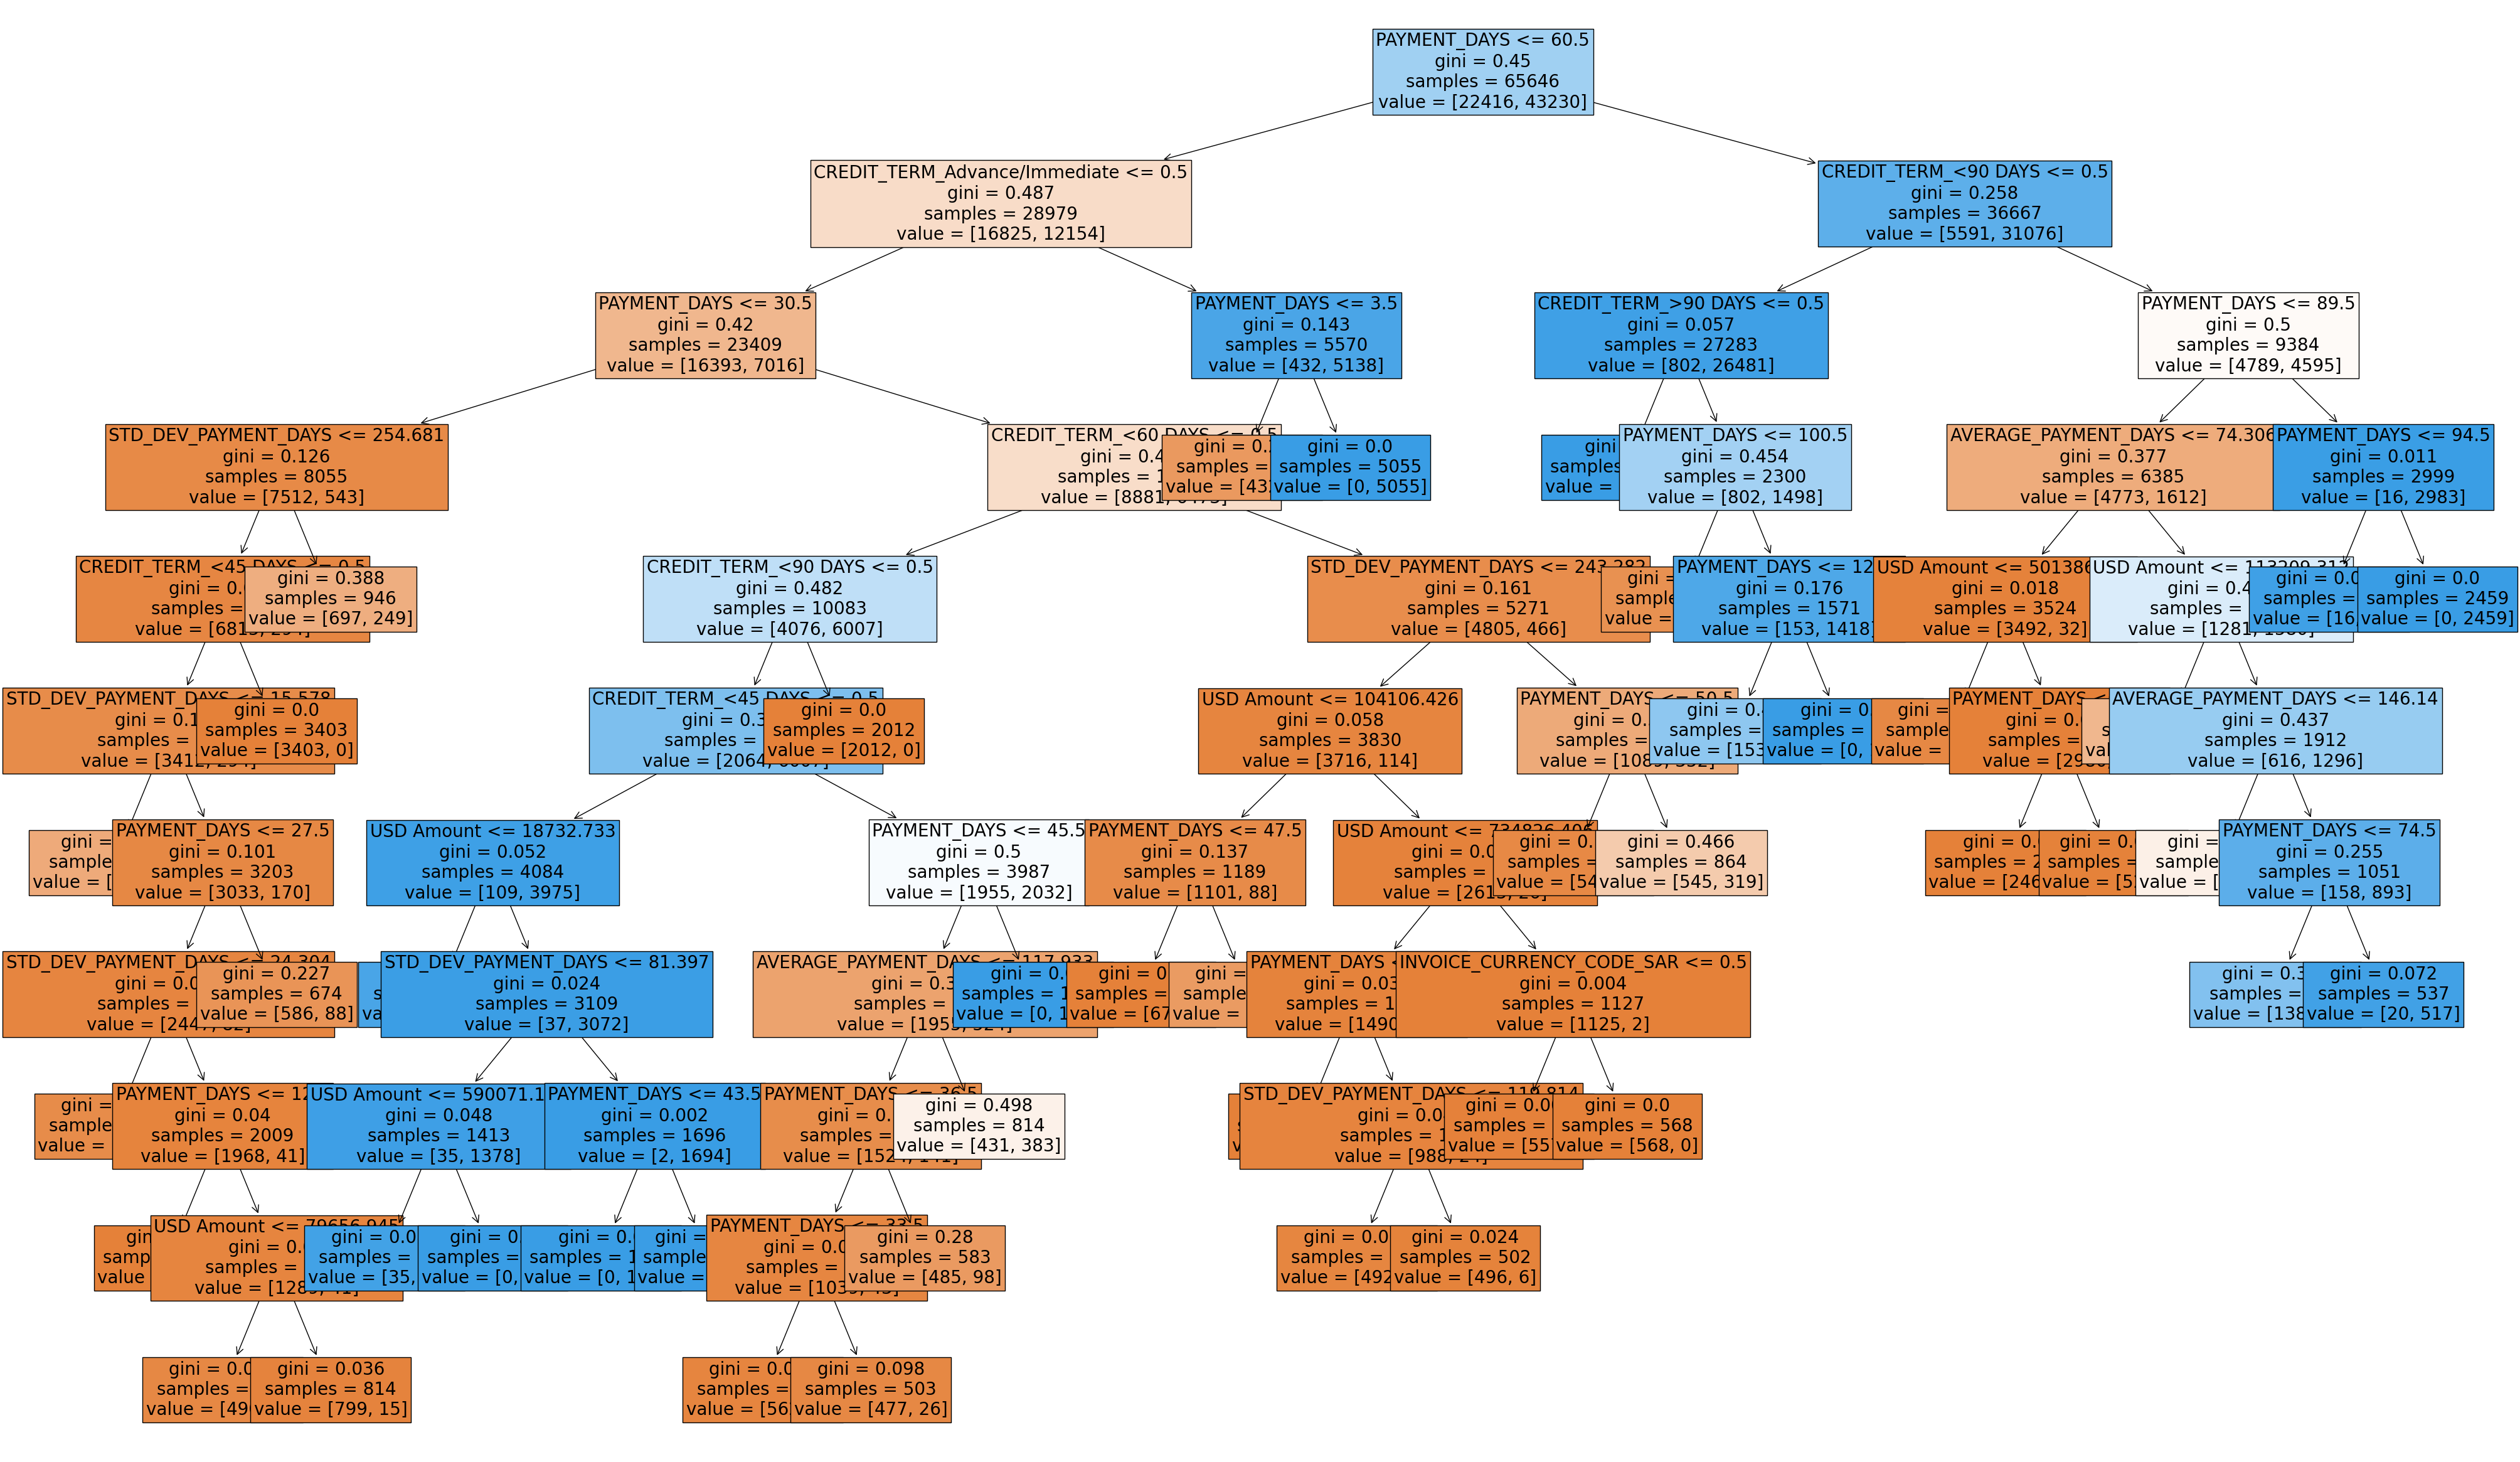

In [1161]:
# Making DT with best estimator

plt.figure(figsize=(50,30))
plot_tree(dt_best, feature_names = X_test.columns,filled=True, fontsize=20);


In [1162]:
# Trying the model with 5th best ranked as above shown in Grid search (where max depth is 10 and min leaf sample data is 1000)

In [1163]:
dt_2 = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=1000)

In [1164]:
dt_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=1000, random_state=42)

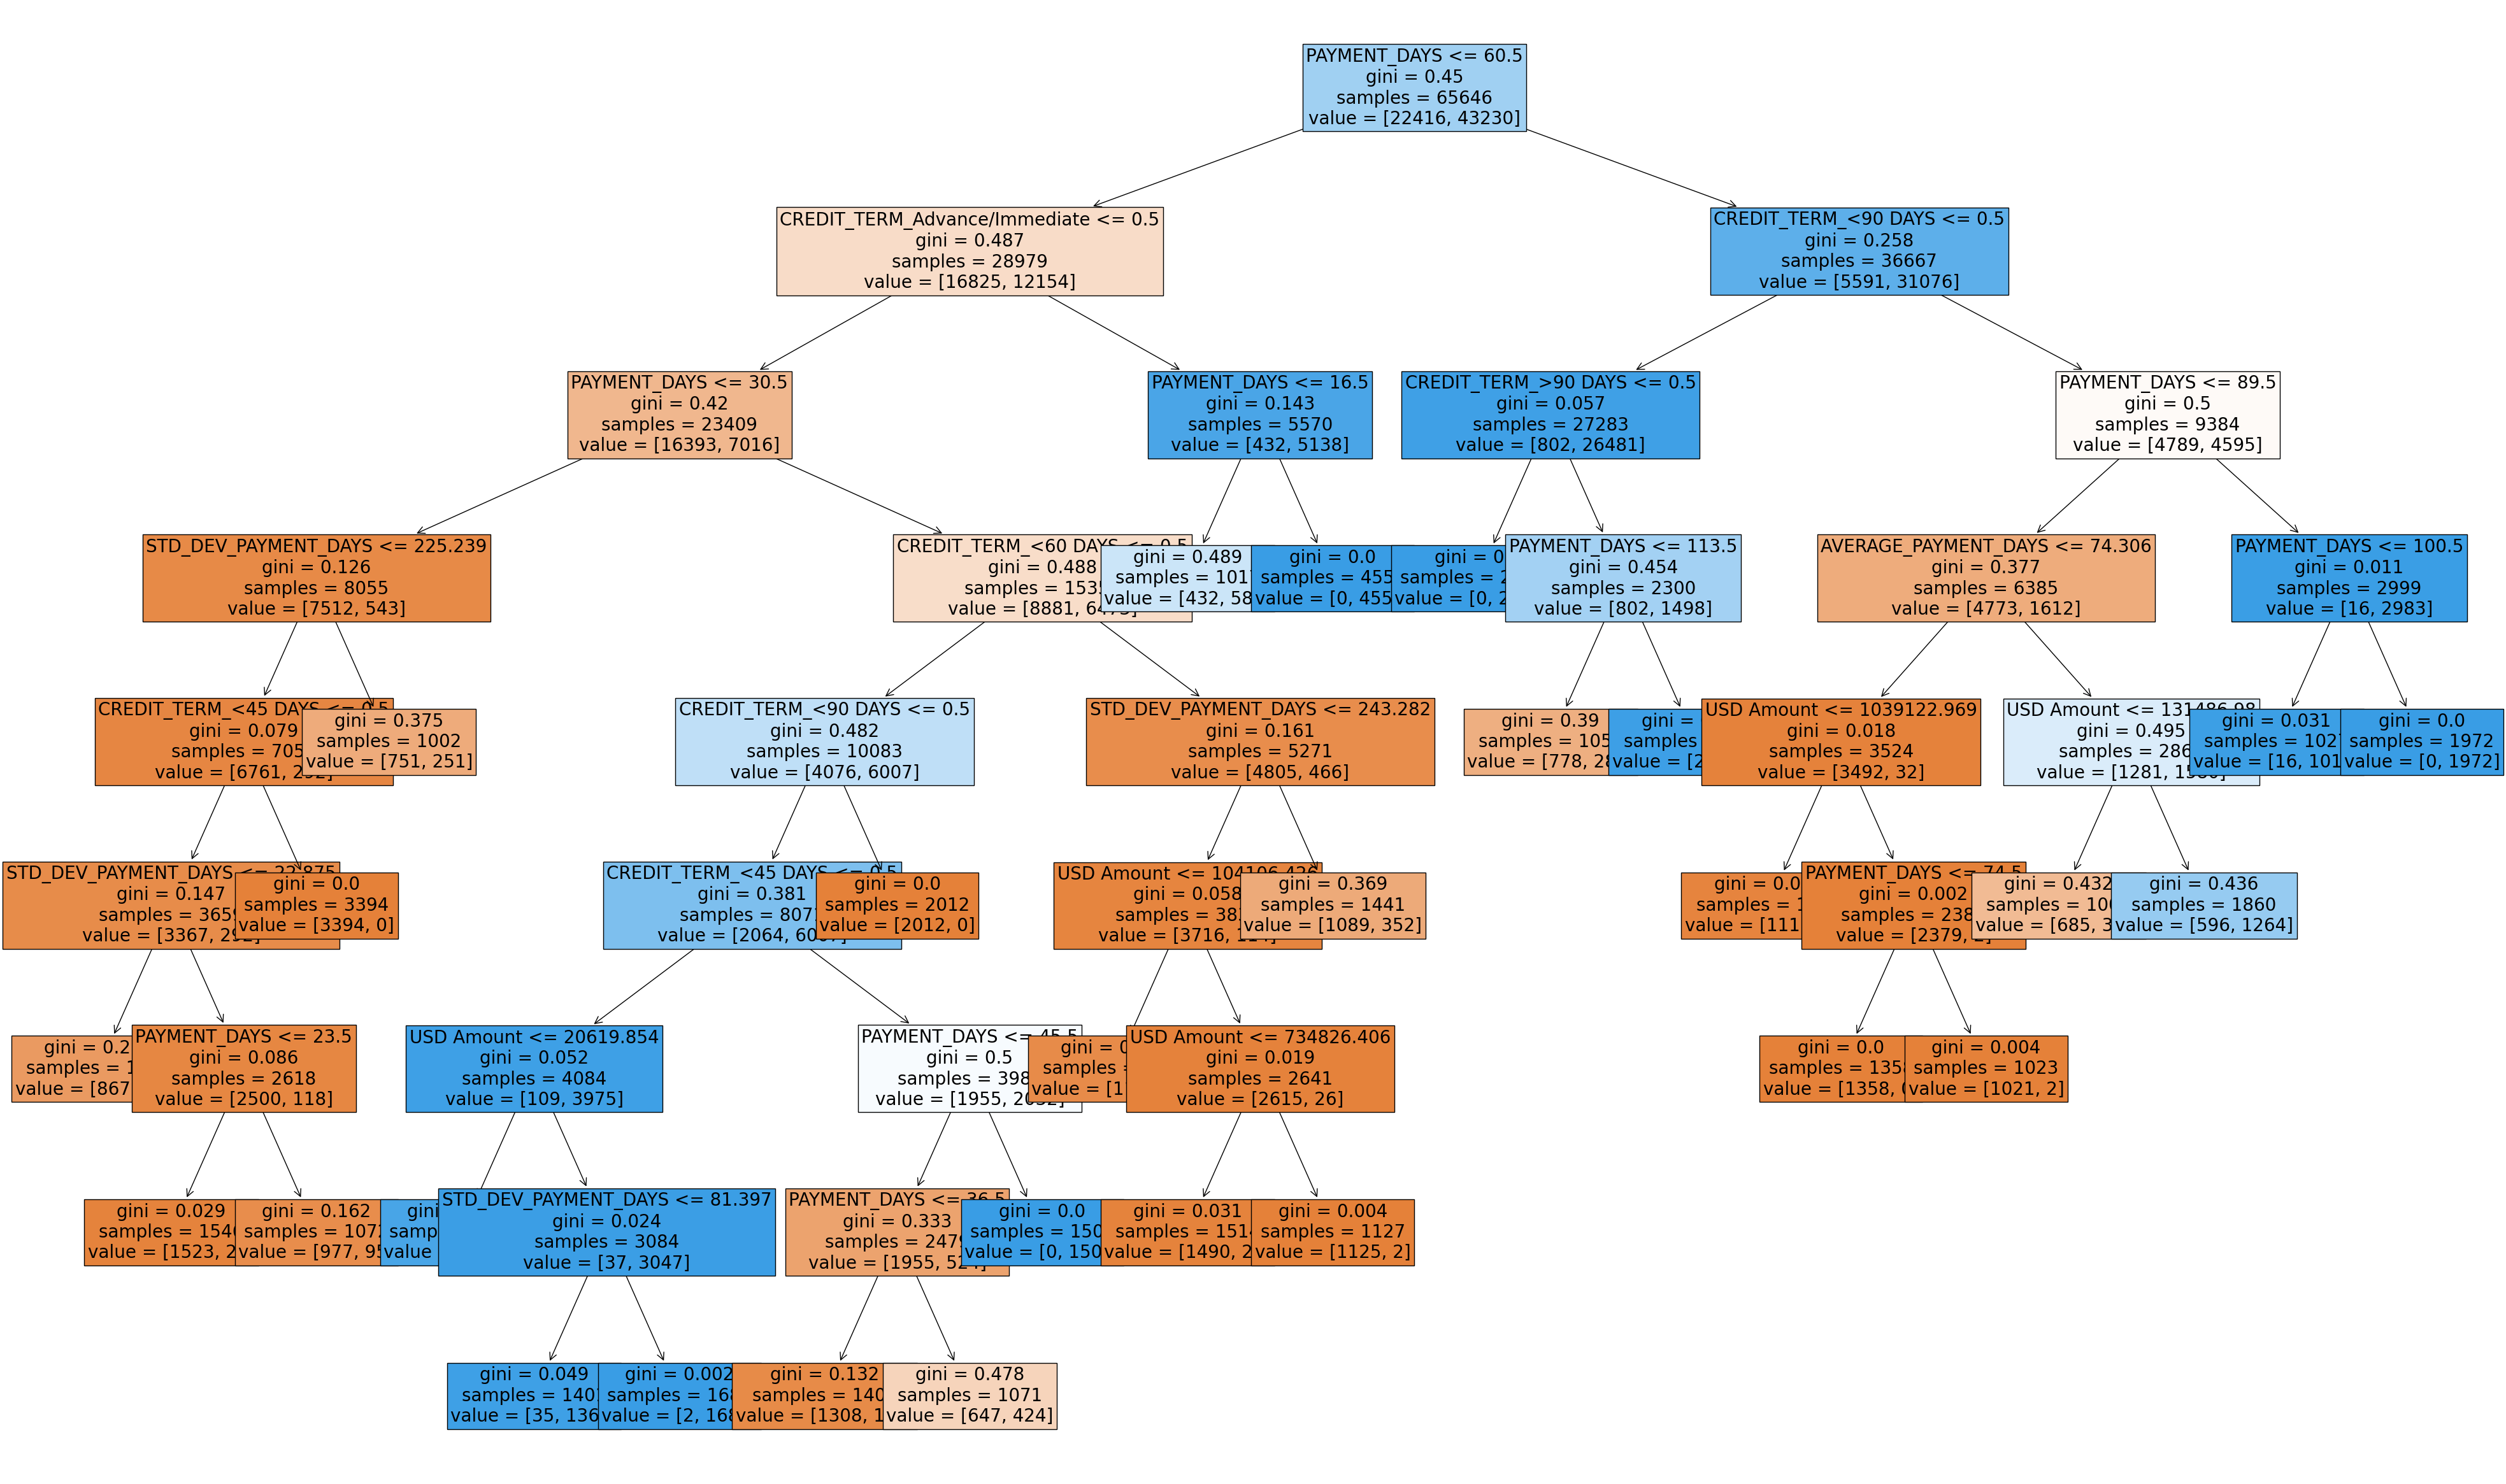

In [1165]:
# Plot the DT with best 5th model.

from sklearn.tree import plot_tree
plt.figure(figsize=(50,30))
plot_tree(dt_2, feature_names = X_train.columns,filled=True, fontsize=20);


In [1166]:
y_train_pred = dt_2.predict(X_train)

In [1167]:
r2_score(y_train, y_train_pred)

0.773805868069848

In [1168]:
y_test_pred = dt_2.predict(X_test)

In [1169]:
r2_score(y_test, y_test_pred)

0.7763772062845102

- r2 score for both test and train are in good range.

In [1170]:
evaluate_model(dt_2)

Train Accuracy : 0.9491362763915547
Train Confusion Matrix:
[[21239  1177]
 [ 2162 41068]]
--------------------------------------------------
Test Accuracy : 0.9500266571885552
Test Confusion Matrix:
[[ 8997   488]
 [  918 17732]]


- Again here also accuracy score is 95%.

In [1171]:
print(classification_report(y_test, dt_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9485
           1       0.97      0.95      0.96     18650

    accuracy                           0.95     28135
   macro avg       0.94      0.95      0.94     28135
weighted avg       0.95      0.95      0.95     28135



- All params are more than 90% score, those are very high.
- With this estimator DT is likely to be overfitting.

#### As DT is overfitting even with grid search, hence we are rejecting this model.

### 4: Using Random Forest Model

In [1172]:
# Import library for RF.

from sklearn.ensemble import RandomForestClassifier

In [1173]:
# Running first model without tunning any hyperparameter

rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [1174]:
%%time
rf.fit(X_train, y_train)

Wall time: 316 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [1175]:
# Finding OOB score

rf.oob_score_

0.8540352801389269

- Even without any hyperparameter tunning we are getting good value of OOB Score.

In [1176]:
# Finding r2 score for train dataset

r2_score(y_train, y_train_pred)

0.773805868069848

In [1177]:
# Finding r2 score for train dataset

r2_score(y_test, y_test_pred)

0.7763772062845102

In [1178]:
# import library for roc curve.

from sklearn.metrics import plot_roc_curve

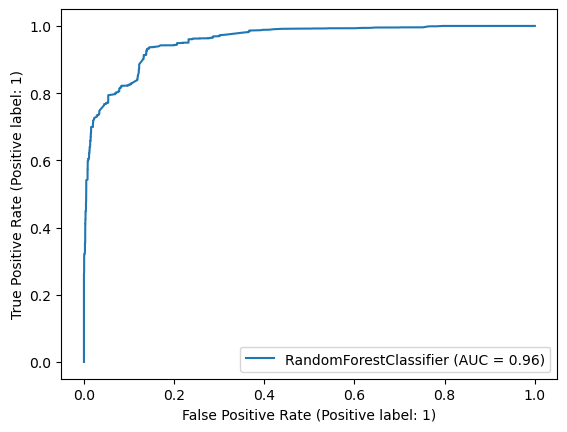

In [1179]:
# Plot the roc curve.

plot_roc_curve(rf, X_train, y_train)
plt.show()

- AUC is 96% is very good value.

### Hyper-parameter tuning for the Random Forest

In [1180]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [1181]:
# Defining hyperparameter ranges.

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [500,1000,2000,5000,10000],
    'n_estimators': [10, 25, 50, 100]
}

In [1182]:
# running gridsearch to find best estimator.

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [1183]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Wall time: 1min 43s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [500, 1000, 2000, 5000, 10000],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [1184]:
grid_search.best_score_

0.9153948059083024

In [1185]:
# Getting best estimator from grid search.

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=500, n_jobs=-1,
                       random_state=42)

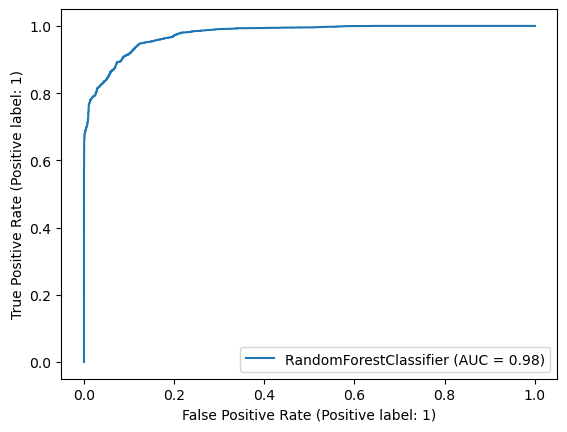

In [1186]:
# Plot the ROC curve.

plot_roc_curve(rf_best, X_train, y_train)
plt.show()

- AUC is 98% which is a bit higher than previous model.

In [1187]:
rf_best.feature_importances_

array([3.65885212e-02, 3.85352743e-01, 1.88876384e-01, 4.67232493e-02,
       0.00000000e+00, 2.80619268e-02, 0.00000000e+00, 1.97422185e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.25268184e-02, 9.67627932e-03, 0.00000000e+00, 3.46765677e-02,
       3.43860301e-02, 9.42281128e-02, 7.65103340e-03, 9.23474504e-02,
       1.87074614e-02])

In [1188]:
# Defining Variable name and Imp columns

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [1189]:
# Sorting all important features which has been predicted by RF.

imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
1                    PAYMENT_DAYS  0.385353
2            AVERAGE_PAYMENT_DAYS  0.188876
17           CREDIT_TERM_<90 DAYS  0.094228
19  CREDIT_TERM_Advance/Immediate  0.092347
3            STD_DEV_PAYMENT_DAYS  0.046723
0                      USD Amount  0.036589
15           CREDIT_TERM_<45 DAYS  0.034677
16           CREDIT_TERM_<60 DAYS  0.034386
5               INVOICE_CLASS_INV  0.028062
12      INVOICE_CURRENCY_CODE_SAR  0.022527
20                     CLUSTER_ID  0.018707
13      INVOICE_CURRENCY_CODE_USD  0.009676
18           CREDIT_TERM_>90 DAYS  0.007651
7       INVOICE_CURRENCY_CODE_EUR  0.000197
11      INVOICE_CURRENCY_CODE_QAR  0.000000
9       INVOICE_CURRENCY_CODE_JOD  0.000000
14      INVOICE_CURRENCY_CODE_ZAR  0.000000
8       INVOICE_CURRENCY_CODE_GBP  0.000000
6       INVOICE_CURRENCY_CODE_BHD  0.000000
4                INVOICE_CLASS_DM  0.000000
10      INVOICE_CURRENCY_CODE_KWD  0.000000

In [1190]:
evaluate_model(rf_best)

Train Accuracy : 0.9137190384791153
Train Confusion Matrix:
[[18305  4111]
 [ 1553 41677]]
--------------------------------------------------
Test Accuracy : 0.91626088501866
Test Confusion Matrix:
[[ 7784  1701]
 [  655 17995]]


## Conclusions

- We tried total three model
    - Logistic Regression: This model is fairly stable with 75% of accuracy score in train and 74% in test dataset.
    - Decision Tree: This model was showing results with very high accuracy score of 95% hence it is overfitting
    - Random Forest: This model also was giving accuracy score of 95% hence we are also not considering this model.
    
- From above results we can see that Logistic Regression model is best to use.
- After running LR model on open invoices dataset finally we saw that nearly 28% of customer are in high risk of late payment.
- Company can focus on these customer and can allocate their resources accordingly.
- This will also improve companies working capital management.
